In [264]:
import pandas as pd
import numpy as np
import os

import pandas as pd
import numpy as np
import os

from itertools import combinations

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import io
import base64
import scipy.stats as stats

from itertools import combinations

from scipy.stats import shapiro, levene, ttest_ind
from joypy import joyplot

In [265]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [266]:
null_values = {'N.A': np.nan, 'N': np.nan, 'N.A.': np.nan, "N,A": np.nan, 'N.A.': np.nan, 'N.A ': np.nan}

In [267]:
carpeta = "data_facenda" #"data_facenda" "data_raw"

# Lista para guardar todos los DataFrames leídos
list_dataframe = []

for archivo in os.listdir(carpeta):
    if "pellet" in archivo.lower() and archivo.lower().endswith('.xlsx'):
        ruta_completa = os.path.join(carpeta, archivo)
        
        try:
            # Leer el archivo como CSV con pandas
            df = pd.read_excel(ruta_completa, skiprows=10)
            cond = df["Fecha Prod."].notnull()
            df = df[cond]
            list_dataframe.append(df)
            print(f"Leído: {archivo} - Filas: {len(df)}")
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")

dataframes = pd.concat(list_dataframe)

Leído: SIG-FT-409 Control proceso Pellet y molienda Planta de alimentos balanceados V4 - Noviembre 2024 (1).xlsx - Filas: 898
Leído: SIG-FT-409 Control proceso Pellet y molienda Planta de alimentos balanceados V4 - Diciembre 2024 (1).xlsx - Filas: 852
Leído: SIG-FT-409 Control proceso Pellet y molienda Planta de alimentos balanceados V4 - Enero 2025 (1).xlsx - Filas: 679
Leído: SIG-FT-409 Control proceso Pellet y molienda Planta de alimentos balanceados V4 - Febrero 2025 (1).xlsx - Filas: 512


In [363]:

dic = pd.read_excel("data_facenda/SIG-FT-411 Control proceso Temperaturas Planta de alimentos balanceados V2 - Diciembre 2024.xlsx", sheet_name="DICIEMBRE", skiprows=3)
ene = pd.read_excel("data_facenda/SIG-FT-411 Control proceso Temperaturas Planta de alimentos balanceados V2 (1).xlsx", sheet_name="DICIEMBRE", skiprows=3)
nov = pd.read_excel("data_facenda/SIG-FT-411 Control proceso Temperaturas Planta de alimentos balanceados V2.xlsx", sheet_name="NOVIEMBRE", skiprows=3)


temp = pd.concat([nov, dic, ene])
temp = temp.reset_index()
temp = temp.replace(null_values)
temp["FORMULACION"] = temp["FORMULACION"].str.strip()

temp = temp[temp["TERMOMETRO AGROINDUSTRIA"].notnull()]
temp.shape

/var/folders/1g/77kw2x4j5678s_87_sqc1fpc0000gp/T/ipykernel_13611/652903096.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(null_values)


(646, 14)

In [364]:
temp.columns

rename = {
'SITIO TOMA DE MUESTRA': 'Punto',
'TERMOMETRO PLANTA': "Termometro planta",
'TERMOMETRO AGROINDUSTRIA' : "Termometro industrial",
'CÓDIGO': "Código",
'FORMULACION': "Dieta",
'OP' : "Op",
}
temp = temp.rename(columns=rename)

In [365]:
temp["Dieta"].value_counts()

Dieta
FINALIZADOR VR.                    160
LEVANTE R ESP VR                   157
C. LEVANTE VR P.                    62
C. INICIACIÓN P. INMUNIDAD          56
C.ENGORDE ESP VR.                   42
C. GESTACION P.                     39
C. GESTACION ESP P.                 21
C.PREINICIACIÓN F1 P. INMUNIDAD     18
LEVANTE VR                          17
C. LACTANCIA PRIMERIZAS P.          12
FINAL VR                             9
ENGORDE ESP VR                       9
C.PREINICIACIÓN F2 P. INMUNIDAD      9
C. LACTANCIA PRIMERIZAS ESP P.       6
C. LEVANTE P. CMC                    6
C. LEVANTE CMC ESP. P                6
C. GESTACION ESP 2                   6
C.LACTANCIA PRIMERIZAS.              3
LACTANCIA PRIMERIZA                  3
C. LEVANTE CMC ESP P.                2
Name: count, dtype: int64

In [366]:
dataframes["Punto"].value_counts()

Punto
TOLVA               1254
ZARANDA 1            861
ZARANDA 2            418
POS-ENGRASE          393
ENFRIADORA             1
DADO PELLET 2          1
ENFRIADORA 1           1
FINOS DEL DADO         1
ENFRIADORA 1 Y 2       1
ACONDICIONADOR 1       1
ACONDICIONADOR 2       1
ACONDICIONADOR 3       1
Name: count, dtype: int64

In [367]:
dataframes["Muestra"].value_counts()

Muestra
PELLET      1680
MOLIENDA    1254
Name: count, dtype: int64

In [368]:

#dataframes["Fecha Prod."] = dataframes["Fecha Prod."].replace({"12/01/202": '2024-12-01', "10/02/202": "2024-10-02"})
#dataframes[dataframes["Fecha Prod."] == '12/01/202']
dataframes["Fecha"] = pd.to_datetime(dataframes["Fecha Prod."], errors="ignore", infer_datetime_format=True).dt.date

dataframes = dataframes[dataframes["Punto"].notnull()]
dataframes["Muestra"] = dataframes["Muestra"].str.strip()
dataframes["Punto"] = dataframes["Punto"].str.strip()
dataframes["Producto"] = dataframes["Producto"].str.strip()

dataframes["Muestra"] = dataframes["Muestra"].str.upper()
dataframes["Punto"] = dataframes["Punto"].str.upper()
dataframes["Producto"] = dataframes["Producto"].str.upper()

dataframes = dataframes.replace(null_values)


temp = temp[(temp["Punto"].notnull()) & (temp["Código"].notnull())]
temp["Punto"] = temp["Punto"].str.strip()
temp["Dieta"] = temp["Dieta"].str.strip()

temp["Punto"] = temp["Punto"].str.upper()
temp["Dieta"] = temp["Dieta"].str.upper()

temp = temp.replace(null_values)

/var/folders/1g/77kw2x4j5678s_87_sqc1fpc0000gp/T/ipykernel_13611/3022917990.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframes["Fecha"] = pd.to_datetime(dataframes["Fecha Prod."], errors="ignore", infer_datetime_format=True).dt.date
/var/folders/1g/77kw2x4j5678s_87_sqc1fpc0000gp/T/ipykernel_13611/3022917990.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  dataframes["Fecha"] = pd.to_datetime(dataframes["Fecha Prod."], errors="ignore", infer_datetime_format=True).dt.date


In [369]:
dataframes["Muestra"].value_counts()

Muestra
PELLET      1680
MOLIENDA    1254
Name: count, dtype: int64

In [370]:
dataframes["Punto"].value_counts()

Punto
TOLVA               1254
ZARANDA 1            861
ZARANDA 2            418
POS-ENGRASE          393
ENFRIADORA             1
DADO PELLET 2          1
ENFRIADORA 1           1
FINOS DEL DADO         1
ENFRIADORA 1 Y 2       1
ACONDICIONADOR 1       1
ACONDICIONADOR 2       1
ACONDICIONADOR 3       1
Name: count, dtype: int64

In [371]:
df_group = dataframes.groupby("OP", as_index=False).agg({"Código": "unique"})

# Contar la cantidad de elementos en cada lista
df_group["Código len"] = df_group["Código"].apply(len)
df_group_ops = df_group[df_group["Código len"]>1]
df_group_ops

,OP,Código,Código len
182,19786.0,"[200544.0, 200104.0]",2
690,20408.0,"[200118.0, 200109.0]",2


In [374]:
df_group_temp = temp.groupby("Op", as_index=False).agg({"Código": "unique"})

# Contar la cantidad de elementos en cada lista
df_group_temp["Código len"] = df_group_temp["Código"].apply(len)
df_group_temp[df_group_temp["Código len"]>1]

,Op,Código,Código len
10,19665,"[200541.0, 200544.0]",2


In [375]:
df_group = dataframes.groupby(["OP", "Fecha"],as_index=False).agg({"Código": "unique"})#.head(40) "Fecha"
df_group = df_group[df_group["OP"].isin(df_group_ops["OP"])]
#df_group["Código len"] = df_group["Código"].apply(len)
df_group["Código"] = df_group["Código"].astype('str')
#df_group["Código len"] = df_group["Código"].apply(lambda x: len(x))
df_group = df_group.drop_duplicates(["OP", "Código"])
#df_group_ops = df_group[df_group["Código len"]>1]
df_group
modo_por_grupo = dataframes.groupby("OP")["Código"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
modo_por_grupo.rename(columns={"Código": "Código_que_mas_se_repite"}, inplace=True)
df_group_bad = pd.merge(df_group, modo_por_grupo, on='OP', how="left")
df_group_bad

,OP,Fecha,Código,Código_que_mas_se_repite
0,19786.0,2024-11-30,[200544.],200104.0
1,19786.0,2024-12-04,[200104.],200104.0
2,20408.0,2025-02-26,[200118.],200109.0
3,20408.0,2025-02-27,[200109.],200109.0


In [376]:
# ops_good = df_group_bad[["OP", "Código_que_mas_se_repite"]]
# ops_good = ops_good.drop_duplicates()


# dataframes = pd.merge(dataframes, ops_good, on="OP", how="left")
# dataframes.loc[dataframes["Código_que_mas_se_repite"].notnull(), "Código"] = dataframes["Código_que_mas_se_repite"]

In [377]:
dataframes["Código"].value_counts()

Código
200544.0    494
200542.0    407
200541.0    364
200118.0    354
200543.0    189
200099.0    168
200104.0    142
200100.0    136
200103.0    118
200117.0     68
200109.0     67
200097.0     67
200107.0     60
200116.0     60
200119.0     40
200130.0     27
200122.0     25
200133.0     22
200132.0     22
200101.0     20
200105.0     15
200131.0     15
200102.0     11
200106.0     11
200564.0     11
200565.0     10
200108.0      8
200266.0      2
Name: count, dtype: int64

In [378]:
dataframes.groupby(["Producto"]).agg({"Código":"unique"})

,Código
Producto,
C.ENGORDE ESP VR,[200543.0]
C.FINALIZADOR P,[200119.0]
C.FINALIZADOR VR P,[200544.0]
C.GESTACION ESP 2,[200101.0]
C.GESTACION ESP P,[200100.0]
C.GESTACION P,[200099.0]
C.GESTACIÓN P CUARENTENA,[200102.0]
C.INICIACIÓN P INMUNIDAD,[200118.0]
C.LACTANCIA PRIMERIZA ESP.,[200104.0]


In [379]:
dataframes.groupby(["Código"], as_index=False).agg({"Producto":"unique"})

,Código,Producto
0,200097.0,[C.REEMPLAZOS P SI-B]
1,200099.0,[C.GESTACION P]
2,200100.0,"[C.GESTACION ESP P, nan]"
3,200101.0,[C.GESTACION ESP 2]
4,200102.0,[C.GESTACIÓN P CUARENTENA]
5,200103.0,[C.LACTANCIA PRIMERIZAS P]
6,200104.0,"[C.LACTANCIA PRIMERIZAS ESP P, C.LACTANCIA PRI..."
7,200105.0,[C.LACTANCIA PRIMERIZAS.]
8,200106.0,[C.LEVANTE ESP. P]
9,200107.0,[C.LEVANTE P]


In [380]:
dataframes.groupby(["Producto"], as_index=False).agg({"Código":"unique"})

,Producto,Código
0,C.ENGORDE ESP VR,[200543.0]
1,C.FINALIZADOR P,[200119.0]
2,C.FINALIZADOR VR P,[200544.0]
3,C.GESTACION ESP 2,[200101.0]
4,C.GESTACION ESP P,[200100.0]
5,C.GESTACION P,[200099.0]
6,C.GESTACIÓN P CUARENTENA,[200102.0]
7,C.INICIACIÓN P INMUNIDAD,[200118.0]
8,C.LACTANCIA PRIMERIZA ESP.,[200104.0]
9,C.LACTANCIA PRIMERIZAS ESP P,[200104.0]


In [381]:
temp.groupby(["Dieta"], as_index=False).agg({"Código":"unique"})

,Dieta,Código
0,C. GESTACION ESP 2,[200101.0]
1,C. GESTACION ESP P.,[200100.0]
2,C. GESTACION P.,[200099.0]
3,C. INICIACIÓN P. INMUNIDAD,[200118.0]
4,C. LACTANCIA PRIMERIZAS ESP P.,"[200104.0, 200109.0]"
5,C. LACTANCIA PRIMERIZAS P.,[200103.0]
6,C. LEVANTE CMC ESP P.,[200108.0]
7,C. LEVANTE CMC ESP. P,[200108.0]
8,C. LEVANTE P. CMC,[200109.0]
9,C. LEVANTE VR P.,"[200541.0, 200542.0]"


In [386]:
replace_temp = {'C.ENGORDE ESP VR.': 'C.ENGORDE ESP VR', 
                'FINAL VR' : 'FINALIZADOR VR.',
                'C. LEVANTE CMC ESP. P': 'C. LEVANTE CMC ESP P.'}
temp["Dieta"] = temp["Dieta"].replace(replace_temp)
temp.groupby(["Dieta"], as_index=False).agg({"Código":"unique"})

,Dieta,Código
0,C. GESTACION ESP 2,[200101.0]
1,C. GESTACION ESP P.,[200100.0]
2,C. GESTACION P.,[200099.0]
3,C. INICIACIÓN P. INMUNIDAD,[200118.0]
4,C. LACTANCIA PRIMERIZAS ESP P.,"[200104.0, 200109.0]"
5,C. LACTANCIA PRIMERIZAS P.,[200103.0]
6,C. LEVANTE CMC ESP P.,[200108.0]
7,C. LEVANTE P. CMC,[200109.0]
8,C. LEVANTE VR P.,"[200541.0, 200542.0]"
9,C.ENGORDE ESP VR,[200543.0]


In [387]:
dataframes[dataframes["Producto"].isin(['C. FINALIZADOR P.', 'C.FINALIZADOR P.'])][["Producto", "Código"]]
dataframes[dataframes["Producto"].isin(['C. FINALIZADOR P.', 'C.FINALIZADOR P.'])][["Producto", "Código"]].value_counts()

Series([], Name: count, dtype: int64)

In [388]:
# Reemplazar "C. " por "C." en la columna 'Dieta' en ambos DataFrames
dataframes['Producto'] = dataframes['Producto'].str.replace(r'\bC\. ', 'C.', regex=True)
# Reemplazar " P." por "P" en la columna 'Dieta' en ambos DataFrames
dataframes['Producto'] = dataframes['Producto'].str.replace(r'\sP\.', ' P', regex=True)
dataframes['Producto'] = dataframes['Producto'].str.replace(r'\sVR\.', ' VR', regex=True)


# Reemplazar "C. " por "C." en la columna 'Dieta' en ambos DataFrames
temp['Dieta'] = temp['Dieta'].str.replace(r'\bC\. ', 'C.', regex=True)
# Reemplazar " P." por "P" en la columna 'Dieta' en ambos DataFrames
temp['Dieta'] = temp['Dieta'].str.replace(r'\sP\.', ' P', regex=True)
temp['Dieta'] = temp['Dieta'].str.replace(r'\sVR\.', ' VR', regex=True)

In [389]:
dataframes[dataframes["Producto"].isin(['C. FINALIZADOR P', 'C.FINALIZADOR P.'])][["Producto", "Código"]]
dataframes[dataframes["Producto"].isin(['C. FINALIZADOR P', 'C.FINALIZADOR P'])][["Producto", "Código"]].value_counts()

Producto         Código  
C.FINALIZADOR P  200119.0    40
Name: count, dtype: int64

In [390]:
producto_cod = pd.DataFrame(dataframes[["Producto", "Código"]].value_counts())
producto_cod = producto_cod.reset_index()
producto_cod.sort_values("Código").head(15)

,Producto,Código,count
9,C.REEMPLAZOS P SI-B,200097.0,67
5,C.GESTACION P,200099.0,168
7,C.GESTACION ESP P,200100.0,135
19,C.GESTACION ESP 2,200101.0,20
23,C.GESTACIÓN P CUARENTENA,200102.0,11
8,C.LACTANCIA PRIMERIZAS P,200103.0,118
6,C.LACTANCIA PRIMERIZAS ESP P,200104.0,138
27,C.LACTANCIA PRIMERIZA ESP.,200104.0,4
20,C.LACTANCIA PRIMERIZAS.,200105.0,15
24,C.LEVANTE ESP. P,200106.0,11


In [395]:
dataframes.groupby(["Producto"]).agg({"Código":"unique"})

,Código
Producto,
C.ENGORDE ESP VR,[200543.0]
C.FINALIZADOR P,[200119.0]
C.FINALIZADOR VR P,[200544.0]
C.GESTACION ESP 2,[200101.0]
C.GESTACION ESP P,[200100.0]
C.GESTACION P,[200099.0]
C.GESTACIÓN P CUARENTENA,[200102.0]
C.INICIACIÓN P INMUNIDAD,[200118.0]
C.LACTANCIA PRIMERIZA ESP.,[200104.0]


In [396]:
cod_with_product = dataframes.groupby(["Código"],as_index=False).agg({"Producto":["unique", "count"]})
cod_with_product.sort_values(["Código"])

Código                                           Producto      
                                                         unique count
0   200097.0                              [C.REEMPLAZOS P SI-B]    67
1   200099.0                                    [C.GESTACION P]   168
2   200100.0                           [C.GESTACION ESP P, nan]   135
3   200101.0                                [C.GESTACION ESP 2]    20
4   200102.0                         [C.GESTACIÓN P CUARENTENA]    11
5   200103.0                         [C.LACTANCIA PRIMERIZAS P]   118
6   200104.0  [C.LACTANCIA PRIMERIZAS ESP P, C.LACTANCIA PRI...   142
7   200105.0                          [C.LACTANCIA PRIMERIZAS.]    15
8   200106.0                                 [C.LEVANTE ESP. P]    11
9   200107.0                                      [C.LEVANTE P]    60
10  200108.0                             [C.LEVANTE CMC ESP. P]     8
11  200109.0                                  [C.LEVANTE P CMC]    67
12  200116.0                   [C.PREINICIACIÓN F1 P INMUNIDAD]    60
13  200117.0  [C.PREINICIACIÓN F2 P INMUNIDAD, C.PREINICIACI...    68
14  200118.0                         [C.INICIACIÓN P INMUNIDAD]   354
15  200119.0                                  [C.FINALIZADOR P]    40
16  200122.0                                 [C.MACHOS ESP 113]    25
17  200130.0                        [C.LACTANCIA SILO H. ALIAR]    27
18  200131.0                          [C.PRELACTANCIA H. ALIAR]    15
19  200132.0                              [C.TERNERAS H. ALIAR]    22
20  200133.0                               [C.NOVILLAS P ALIAR]    22
21  200266.0                                    [C.MAIZ MOLIDO]     2
22  200541.0                                   [C.LEVANTE VR P]   364
23  200542.0         [LEVANTE R ESP VR, LEVANTE R ESP VR 0927C]   407
24  200543.0                                 [C.ENGORDE ESP VR]   189
25  200544.0               [FINALIZADOR VR, C.FINALIZADOR VR P]   494
26  200564.0                                  [C.NOVILLAS CEBA]    11
27  200565.0                               [C.NOVILLAS LEVANTE]    10

In [397]:
cod_prod = dataframes[["Producto", "Código"]]
cod_prod = cod_prod.drop_duplicates()
# Contar códigos únicos por producto
codigo_por_producto = cod_prod.groupby('Producto')['Código'].nunique()

# Filtrar productos con más de un código
productos_varios_codigos = codigo_por_producto[codigo_por_producto > 1]
productos_varios_codigos


Series([], Name: Código, dtype: int64)

In [398]:
cod_prod = temp[["Dieta", "Código"]]
cod_prod = cod_prod.drop_duplicates()
# Contar códigos únicos por producto
codigo_por_producto = cod_prod.groupby('Dieta')['Código'].nunique()

# Filtrar productos con más de un código
productos_varios_codigos = codigo_por_producto[codigo_por_producto > 1]
productos_varios_codigos

Dieta
C.LACTANCIA PRIMERIZAS ESP P    2
C.LEVANTE VR P                  2
LEVANTE VR                      2
Name: Código, dtype: int64

In [399]:
rename = {

'% Durab.' : "Porcentaje Durabilidad",
' Dureza kg/cm²': "Dureza",
'10,00': "Malla 10%",
'12,00': "Malla 12%",
'14,00':  "Malla 14%", 
'16,00':  "Malla 16%",
'PAN':  "Pan",
'ANALISTA ': "Analista",
'Producto': "Dieta",
"OP": "Orden producción",
'SITIO TOMA DE MUESTRA': "Punto",
'CÓDIGO': "Código", 
'FORMULACION': "Dieta",
}
df_filter = dataframes.rename(columns=rename)

In [400]:
df_filter.isnull().sum()

Columna1                   2046
Fecha Prod.                   0
Hora Proceso                  1
Muestra                       0
Punto                         0
Código                        1
Dieta                         2
Orden producción              2
CANT. BACHES A PRODUCIR       3
# BACHE                       7
m1                         1259
m2                         1260
Porcentaje Durabilidad     1260
Dureza                     1261
% Finos                    1256
Criba                      1692
Malla 10%                  1687
Malla 12%                  1687
Malla 14%                  1688
Malla 16%                  1687
Pan                        1688
OPERADOR                      2
Analista                      3
OBSERVACIONES              2490
Columna2                   2934
Unnamed: 25                2934
Unnamed: 26                2931
Columna 1                  1405
Columna 1                  2424
Fecha                         0
dtype: int64

In [401]:
df_filter[df_filter["m1"].notnull() & (df_filter["Muestra"] =="MOLIENDA")].T

,33,86
Columna1,NaN,NaN
Fecha Prod.,2025-02-03 00:00:00,2025-02-06 00:00:00
Hora Proceso,08:12:00,08:15:00
Muestra,MOLIENDA,MOLIENDA
Punto,TOLVA,TOLVA
Código,200543.0,200541.0
Dieta,C.ENGORDE ESP VR,C.LEVANTE VR P
Orden producción,20235.0,20258.0
CANT. BACHES A PRODUCIR,27.0,68.0
# BACHE,7,26


In [402]:
df_filter["Muestra"].value_counts()

Muestra
PELLET      1680
MOLIENDA    1254
Name: count, dtype: int64

In [403]:
temp.isnull().sum()

index                      0
FECHA TOMA DE MUESTRA    572
HORA                     573
TURNO                    574
Punto                      1
Termometro planta        427
Termometro industrial      0
Código                     0
Dieta                      0
Op                         0
RESPONSABLE                0
OBSERVACIONES            633
Unnamed: 11              643
Unnamed: 12              640
dtype: int64

In [404]:
def build_group(group_, agg_, df):
    agg = dict(
    Media=(agg_, "mean"),
    Mínimo=(agg_, "min"), 
    P25=(agg_, lambda x: x.quantile(0.25)),
    Mediana=(agg_, "median"),
    P75=(agg_, lambda x: x.quantile(0.75)),
    Máximo=(agg_, "max"),
    Cantidad=(agg_, "count"),
    Desviacion_Estandar=(agg_, "std"),  # Dispersión
    Varianza=(agg_, "var"),             # Varianza
    Error_Estandar=(agg_, lambda x: x.std() / (len(x) ** 0.5))  # Error estándar de la media

    )

    df_filter_group = df.groupby(group_, as_index=False).agg(**agg)

    # Iterar sobre las columnas y redondear a dos decimales si son numéricas
    for col in df_filter_group.columns:
        if pd.api.types.is_numeric_dtype(df_filter_group[col]):
            df_filter_group[col] = df_filter_group[col].round(2)
    rename = {"Desviacion_Estandar": "Desviación estandar", "Error_Estandar": "Error estandar"}
    df_filter_group = df_filter_group.rename(columns=rename)
    
    return df_filter_group


In [405]:
df_filter_pellet = df_filter[df_filter["Muestra"] == "PELLET"]
df_filter_pellet = df_filter_pellet.reset_index()
df_filter_molienda = df_filter[df_filter["Muestra"] == "MOLIENDA"]
df_filter_molienda = df_filter_molienda.reset_index()

In [406]:
df_filter_pellet["Punto"].value_counts()

Punto
ZARANDA 1           860
ZARANDA 2           418
POS-ENGRASE         393
TOLVA                 4
ENFRIADORA            1
DADO PELLET 2         1
ENFRIADORA 1          1
FINOS DEL DADO        1
ENFRIADORA 1 Y 2      1
Name: count, dtype: int64

In [407]:
df_filter_molienda["Punto"].value_counts()

Punto
TOLVA               1250
ZARANDA 1              1
ACONDICIONADOR 1       1
ACONDICIONADOR 2       1
ACONDICIONADOR 3       1
Name: count, dtype: int64

In [408]:
def build_stadistic(df, metrics, group_, name_group,  name_file,):

   
    df[metrics] = df[metrics].apply(pd.to_numeric, errors='coerce')
    df_ = df.reset_index(drop=True)

    grad_list = []  
    for col in metrics:
        group = build_group(group_=group_, agg_=col, df=df_)
        if name_group != "":
            group[name_group] = col
        grad_list.append(group)

    # Concatenar todos los DataFrames en uno solo
    grad = pd.concat(grad_list).reset_index(drop=True)
    if name_group != "":

        order_col = [name_group] + group_ +["Media", "Cantidad","Mínimo", "P25", "Mediana", "P75",
                    "Máximo", "Desviación estandar", "Varianza",  "Error estandar"]
    else:
        order_col =  group_ +["Media", "Cantidad","Mínimo", "P25", "Mediana", "P75",
                    "Máximo", "Desviación estandar", "Varianza",  "Error estandar"]

    grad_ = grad.loc[:, order_col]
    grad = grad_[grad_["Cantidad"] > 5] #TODO: ¿cual seria un limite adecuado?
    cols_ = ["Dieta", "Punto"]
    if ("Punto" in grad.columns) and ("Dieta" in grad.columns):
        grad = grad.sort_values(cols_).reset_index(drop=True)

    grad.to_csv(f"../data_facenda/estadisticos_{name_file}.csv", index=False)

    return grad

In [409]:
granularidades = ['Malla 10%', 'Malla 12%', 'Malla 14%', 'Malla 16%', 'Pan']
granulometria_dieta = build_stadistic(
    df=df_filter_molienda,
    metrics=granularidades, 
    group_=["Dieta",], # "Código"
    name_group="Granulometría",  
    name_file="granulometria_dieta")
granulometria_dieta


,Granulometría,Dieta,Media,Cantidad,Mínimo,P25,Mediana,P75,Máximo,Desviación estandar,Varianza,Error estandar
0,Malla 10%,C.ENGORDE ESP VR,0.30,70,0.04,0.16,0.28,0.40,0.90,0.18,0.03,0.02
1,Malla 10%,C.FINALIZADOR P,0.35,19,0.08,0.24,0.32,0.48,0.92,0.20,0.04,0.04
2,Malla 10%,C.GESTACION ESP 2,0.20,9,0.12,0.12,0.16,0.24,0.36,0.08,0.01,0.03
3,Malla 10%,C.GESTACION ESP P,0.27,54,0.04,0.16,0.24,0.36,1.25,0.19,0.04,0.03
4,Malla 10%,C.GESTACION P,0.27,70,0.04,0.12,0.25,0.36,1.04,0.21,0.04,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Pan,C.PRELACTANCIA H. ALIAR,89.10,7,86.92,87.02,88.60,90.72,92.68,2.53,6.42,0.96
141,Pan,C.REEMPLAZOS P SI-B,92.01,32,86.28,91.31,92.30,92.97,94.84,1.72,2.96,0.30
142,Pan,C.TERNERAS H. ALIAR,94.20,11,90.88,93.22,94.32,95.54,96.28,1.64,2.70,0.50
143,Pan,FINALIZADOR VR,91.22,206,74.66,90.08,91.64,92.56,100.00,2.25,5.05,0.16


In [410]:
granulometria_dieta["Cantidad"].describe()

count    125.000000
mean      49.280000
std       55.645856
min        6.000000
25%       11.000000
50%       30.000000
75%       64.000000
max      206.000000
Name: Cantidad, dtype: float64

In [411]:
dietas_75 = granulometria_dieta[granulometria_dieta["Cantidad"]> granulometria_dieta["Cantidad"].quantile(.65)]["Dieta"].unique()
df_filter_molienda_cut = df_filter_molienda[df_filter_molienda["Dieta"].isin(dietas_75)] 
df_filter_molienda_cut.shape, df_filter_molienda.shape

((927, 31), (1254, 31))

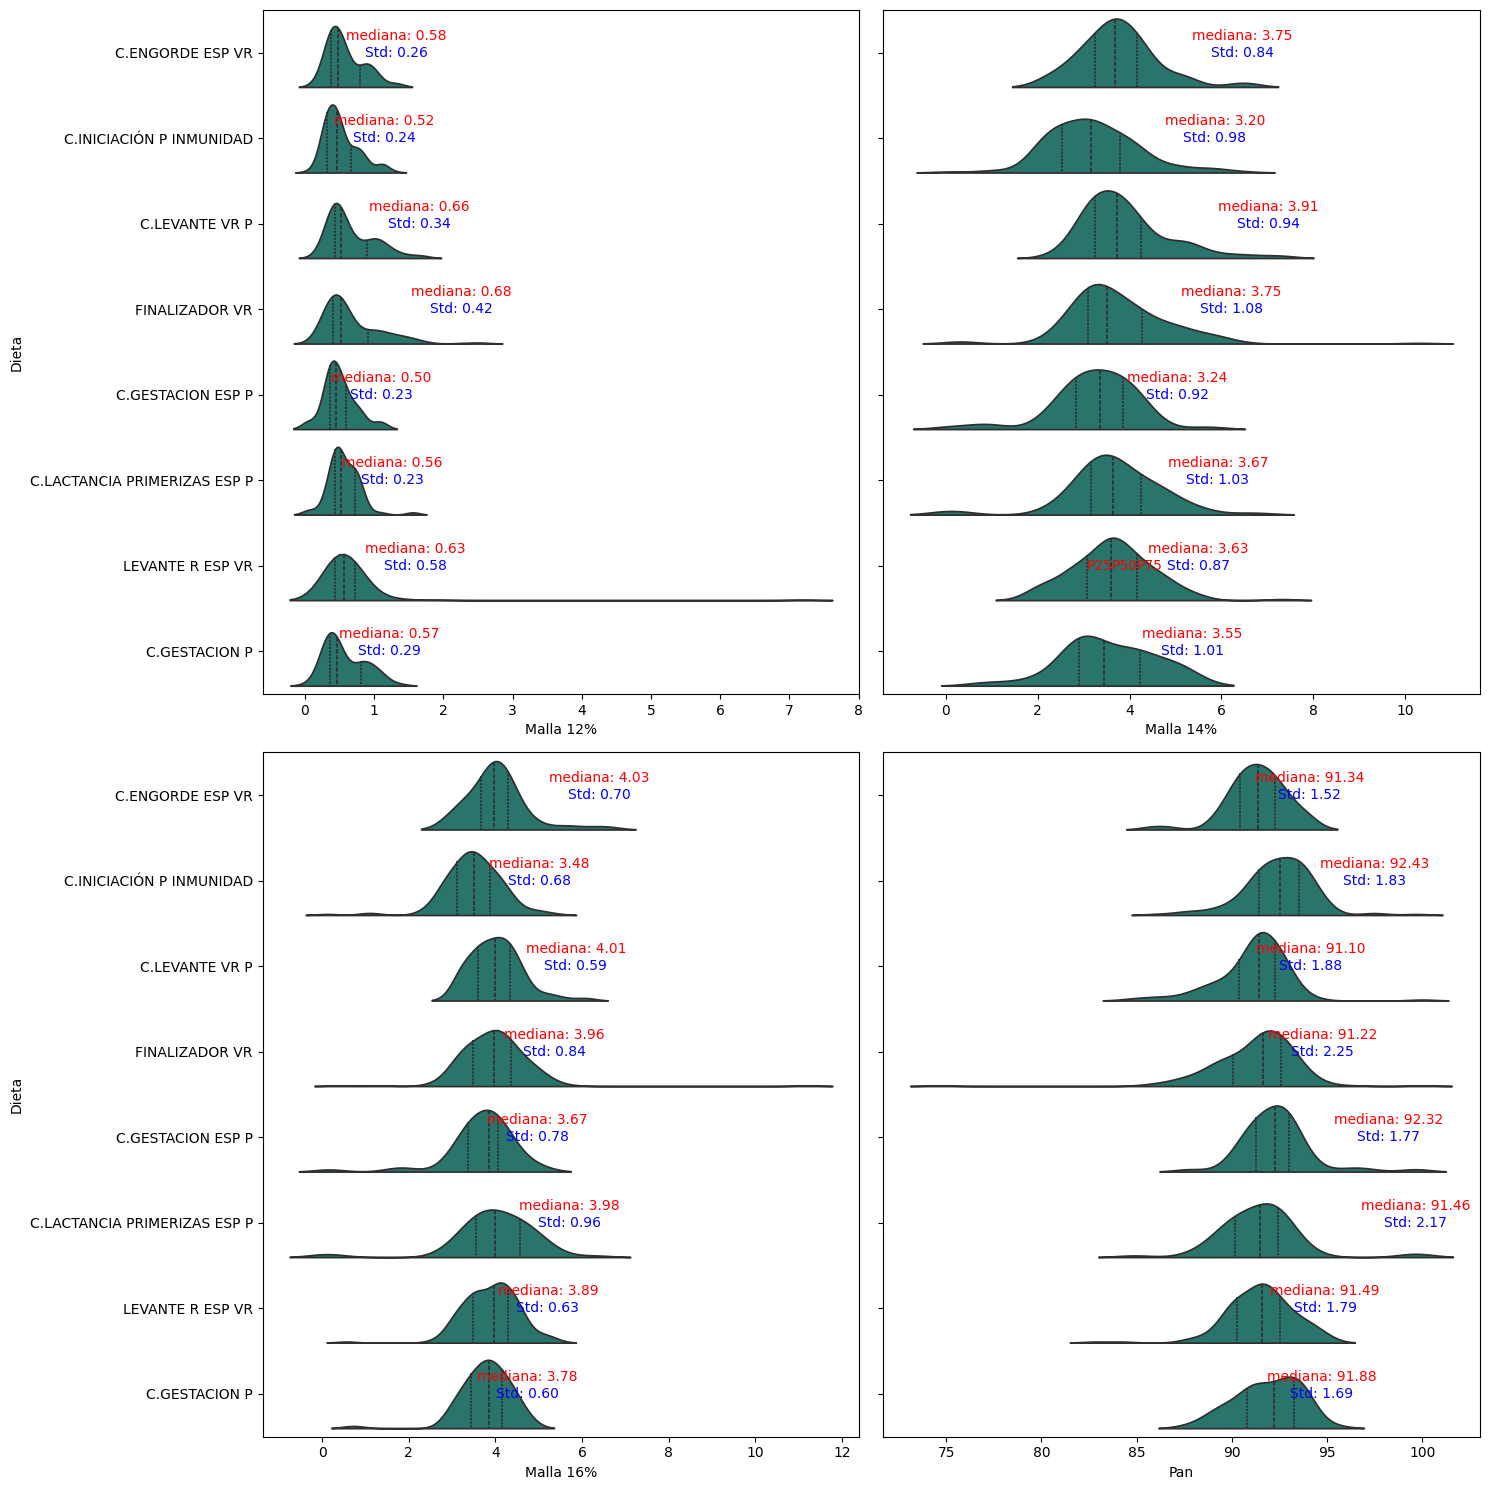

In [453]:

# Lista de variables y títulos para cada subplot
variables = ["Malla 12%", "Malla 14%", "Malla 16%", "Pan"]
titles = ["Malla 12%", "Malla 14%", "Malla 16%", "Pan"]

# Crear la figura con subplots 2x2 que comparten el eje y
fig, axs = plt.subplots(2, 2, figsize=(15, 15), sharey=True)

# Recorrer cada eje y variable para trazar los gráficos
for ax, var, title in zip(axs.flat, variables, titles):
    # Gráfico de violín
    sns.violinplot(data=df_filter_molienda_cut, y="Dieta", x=var, inner='quartile', split=True,
                   ax=ax, color="#1c8074")
    
    # Calcular y mostrar los percentiles y desviación estándar para cada categoría en 'Dieta'
    categorias = df_filter_molienda_cut["Dieta"].unique()
    yticks = ax.get_yticks()  # Obtener posiciones Y de las etiquetas de Dieta
    
    for i, (categoria, ypos) in enumerate(zip(categorias, yticks)):
        # Obtener datos por categoría
        datos_categoria = df_filter_molienda_cut[df_filter_molienda_cut["Dieta"] == categoria][var].dropna()
        
        # Calcular percentiles
        percentiles = np.percentile(datos_categoria, [25,50, 75])
        
        # Calcular desviación estándar
        std_dev = np.std(datos_categoria, ddof=1)  # ddof=1 para muestra
        
        # Obtener la mediana
        mediana = np.quantile(datos_categoria, .99)
        mean_ = np.mean(datos_categoria)
        
        # Colocar los percentiles en el gráfico
        for p, label in zip(percentiles, ['P25','P50', 'P75']):
            if (categoria=='LEVANTE R ESP VR') and (var=="Malla 14%"):
                
                ax.text(p, ypos, label, 
                        va='center', 
                        fontsize=10, color='red')
        
        # Mostrar la desviación estándar en la posición de la mediana
        ax.text(mediana, ypos, f"Std: {std_dev:.2f}", 
                fontsize=10, color='blue', 
                ha='center', va='center',
                transform=ax.transData,
                #bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray')
                )
        ax.text(mediana, ypos-0.2, f"mediana: {mean_:.2f}", 
                fontsize=10, color='red', 
                ha='center', va='center',
                transform=ax.transData,
                #bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray')
                )

    # Etiquetas y títulos
    #ax.set_title(title)
    ax.set_xlabel(var)
    ax.set_ylabel("Dieta")

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Guardar la imagen antes de mostrarla
plt.savefig("../images_facenda/granulometria_violin_plots.png", dpi=300)

# Mostrar la imagen en pantalla
plt.show()

# Cerrar la figura para liberar memoria
plt.close()


In [540]:
df_filter_pellet.columns

Index(['index', 'Columna1', 'Fecha Prod.', 'Hora Proceso', 'Muestra', 'Punto',
       'Código', 'Dieta', 'Orden producción', 'CANT. BACHES A PRODUCIR',
       '# BACHE', 'm1', 'm2', 'Porcentaje Durabilidad', 'Dureza', '% Finos',
       'Criba', 'Malla 10%', 'Malla 12%', 'Malla 14%', 'Malla 16%', 'Pan',
       'OPERADOR', 'Analista', 'OBSERVACIONES', 'Columna2', 'Unnamed: 25',
       'Unnamed: 26', 'Columna 1', 'Columna 1 ', 'Fecha'],
      dtype='object')

In [549]:
df = df_filter_pellet[["Punto", "Dieta", "Dureza", "Porcentaje Durabilidad"]]
z1 = set(df[df["Punto"] == "ZARANDA 1"]["Dieta"].unique())
z2 = set(df[df["Punto"] == "ZARANDA 2"]["Dieta"].unique())
die = set.intersection(z1,z2)
con1 = df["Punto"].isin(["ZARANDA 1", "ZARANDA 2"])
con2 = df["Dieta"].isin(die)
df = df[con1 & con2]

In [563]:
df["Dieta"].value_counts()

Dieta
FINALIZADOR VR                    279
LEVANTE R ESP VR                  241
C.LEVANTE VR P                    210
C.ENGORDE ESP VR                  113
C.GESTACION P                      81
C.GESTACION ESP P                  58
C.LEVANTE P CMC                    37
C.PREINICIACIÓN F2 P INMUNIDAD     34
C.LEVANTE P                        33
C.REEMPLAZOS P SI-B                33
C.PREINICIACIÓN F1 P INMUNIDAD     29
C.FINALIZADOR P                    20
C.LACTANCIA SILO H. ALIAR          15
C.INICIACIÓN P INMUNIDAD            9
C.GESTACION ESP 2                   9
C.LACTANCIA PRIMERIZAS P            9
C.LEVANTE ESP. P                    6
C.FINALIZADOR VR P                  4
C.LACTANCIA PRIMERIZAS ESP P        4
C.LEVANTE CMC ESP. P                4
Name: count, dtype: int64

In [640]:
df_levante = df[df["Dieta"] == "C.LEVANTE P CMC"]

df_gestacion = df[df["Dieta"] == "C.GESTACION ESP P"]
df_levante.shape, df_gestacion.shape

((37, 4), (58, 4))

In [642]:
df["Dieta"].nunique()

20

In [644]:
df_levante["Punto"].value_counts()

Punto
ZARANDA 1    20
ZARANDA 2    17
Name: count, dtype: int64

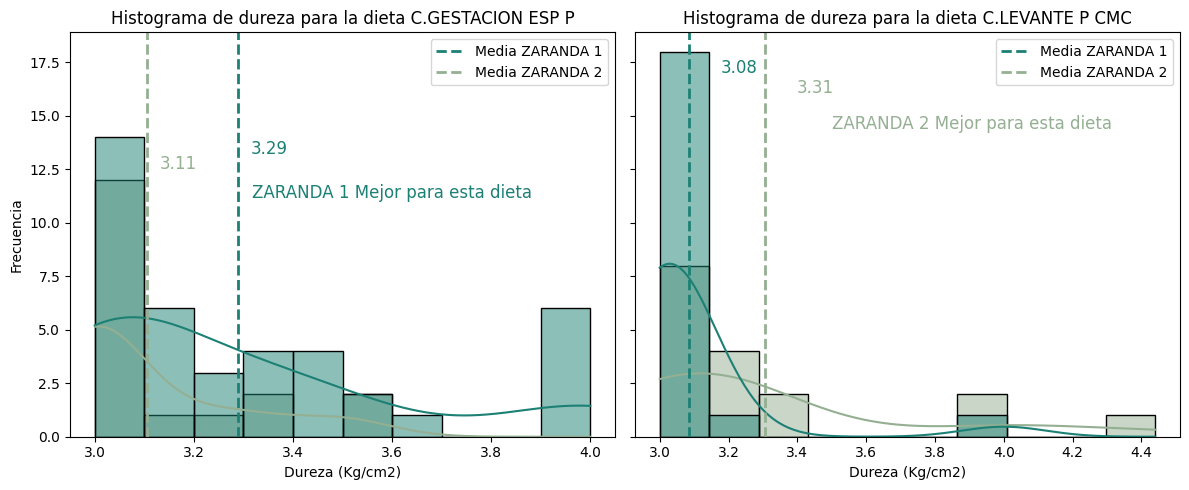

In [ ]:
df_levante = df[df["Dieta"] == "C.LEVANTE P CMC"]

df_gestacion = df[df["Dieta"] == "C.GESTACION ESP P"]
df_levante.shape, df_gestacion.shape

# Definir la paleta de colores personalizada
palette = ["#1c8074", "#94AF92"]

# Calcular las medias de dureza por zaranda
mean_z1 = df_gestacion[df_gestacion["Punto"] == "ZARANDA 1"]["Dureza"].mean()
mean_z2 = df_gestacion[df_gestacion["Punto"] == "ZARANDA 2"]["Dureza"].mean()

mean_z1_ = df_levante[df_levante["Punto"] == "ZARANDA 1"]["Dureza"].mean()
mean_z2_ = df_levante[df_levante["Punto"] == "ZARANDA 2"]["Dureza"].mean()

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Graficar en el primer subgráfico
sns.histplot(data=df_gestacion, x="Dureza", hue="Punto", kde=True, bins=10, palette=palette, ax=axes[0])
axes[0].axvline(mean_z1, color=palette[0], linestyle="dashed", linewidth=2, label="Media ZARANDA 1")
axes[0].axvline(mean_z2, color=palette[1], linestyle="dashed", linewidth=2, label="Media ZARANDA 2")
axes[0].text(mean_z1+0.1, axes[0].get_ylim()[1] * 0.9, f"{mean_z1:.2f}", color=palette[0], fontsize=12, ha="right")
axes[0].text(mean_z2+0.1, axes[0].get_ylim()[1] * 0.85, f"{mean_z2:.2f}", color=palette[1], fontsize=12, ha="right")
axes[0].text(3.6, axes[0].get_ylim()[1] * 0.76, f"ZARANDA 1 Mejor para esta dieta", color=palette[0], fontsize=12, ha="center")
axes[0].set_xlabel("Dureza (Kg/cm2)")
axes[0].set_ylabel("Frecuencia")

axes[0].set_title("Histograma de dureza para la dieta C.GESTACION ESP P")
axes[0].legend()

# Graficar en el segundo subgráfico (misma gráfica)
sns.histplot(data=df_levante, x="Dureza", hue="Punto", kde=True, bins=10, palette=palette, ax=axes[1])
axes[1].axvline(mean_z1_, color=palette[0], linestyle="dashed", linewidth=2, label="Media ZARANDA 1")
axes[1].axvline(mean_z2_, color=palette[1], linestyle="dashed", linewidth=2, label="Media ZARANDA 2")
axes[1].text(mean_z1_+0.2, axes[1].get_ylim()[1] * 0.9, f"{mean_z1_:.2f}", color=palette[0], fontsize=12, ha="right")
axes[1].text(mean_z2_+0.2, axes[1].get_ylim()[1] * 0.85, f"{mean_z2_:.2f}", color=palette[1], fontsize=12, ha="right")
axes[1].text(mean_z2_+0.6, axes[0].get_ylim()[1] * 0.76, f"ZARANDA 2 Mejor para esta dieta", color=palette[1], fontsize=12, ha="center")

axes[1].set_xlabel("Dureza (Kg/cm2)")
#axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Histograma de dureza para la dieta C.LEVANTE P CMC")
axes[1].legend()

# Ajustar diseño y mostrar
plt.tight_layout()
plt.savefig(f"../images_facenda/histograma_mejor_dieta.png", dpi=300)

plt.show()



In [550]:
from scipy.stats import ttest_ind

# Agrupar los datos por dieta
dietas = df["Dieta"].unique()

# Crear un diccionario para almacenar los resultados
resultados = []

for dieta in dietas:
    # Filtrar los datos por dieta y zaranda
    dureza_z1 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 1")]["Dureza"]
    dureza_z2 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 2")]["Dureza"]
    
    # Verificar si hay suficientes datos en ambas zarandas
    if len(dureza_z1) > 1 and len(dureza_z2) > 1:
        # Prueba t de Student
        stat, p_value = ttest_ind(dureza_z1, dureza_z2, equal_var=False)  # Asumiendo varianzas desiguales
        
        # Determinar si la diferencia es significativa
        significativa = "Sí" if p_value < 0.05 else "No"
        
        # Determinar cuál zaranda tiene mayor dureza media
        media_z1 = dureza_z1.mean()
        media_z2 = dureza_z2.mean()
        mejor_zaranda = "ZARANDA 1" if media_z1 > media_z2 else "ZARANDA 2" if media_z2 > media_z1 else "Iguales"
        
        # Guardar los resultados
        resultados.append([dieta, media_z1, media_z2, p_value, significativa, mejor_zaranda])

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados, columns=["Dieta", "Media ZARANDA 1", "Media ZARANDA 2", "Valor p", "Diferencia Significativa", "Mejor Zaranda"])

resultados_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Dieta,Media ZARANDA 1,Media ZARANDA 2,Valor p,Diferencia Significativa,Mejor Zaranda
0,C.ENGORDE ESP VR,3.010784,3.088889,NaN,No,ZARANDA 2
1,C.REEMPLAZOS P SI-B,3.248148,3.133333,0.282803,No,ZARANDA 1
2,C.LEVANTE P,3.070370,3.066667,0.947278,No,ZARANDA 1
3,C.LEVANTE VR P,3.062627,3.090543,0.404940,No,ZARANDA 2
4,FINALIZADOR VR,3.037540,3.057829,NaN,No,ZARANDA 2
5,C.GESTACION ESP P,3.288750,3.105556,0.009551,Sí,ZARANDA 1
6,C.LEVANTE P CMC,3.085000,3.307059,0.065306,No,ZARANDA 2
7,LEVANTE R ESP VR,3.045574,3.029825,NaN,No,ZARANDA 1
8,C.INICIACIÓN P INMUNIDAD,3.033333,3.000000,0.422650,No,ZARANDA 1
9,C.LACTANCIA PRIMERIZAS ESP P,3.000000,3.050000,0.500000,No,ZARANDA 2


In [551]:
from scipy.stats import mannwhitneyu

# Crear un diccionario para almacenar los resultados del test no paramétrico
resultados_no_param = []

for dieta in dietas:
    # Filtrar los datos por dieta y zaranda
    dureza_z1 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 1")]["Dureza"]
    dureza_z2 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 2")]["Dureza"]
    
    # Verificar si hay suficientes datos en ambas zarandas
    if len(dureza_z1) > 1 and len(dureza_z2) > 1:
        # Prueba de Mann-Whitney U (prueba no paramétrica)
        stat, p_value = mannwhitneyu(dureza_z1, dureza_z2, alternative='two-sided')
        
        # Determinar si la diferencia es significativa
        significativa = "Sí" if p_value < 0.05 else "No"
        
        # Determinar cuál zaranda tiene mayor dureza media
        media_z1 = dureza_z1.mean()
        media_z2 = dureza_z2.mean()
        mejor_zaranda = "ZARANDA 1" if media_z1 > media_z2 else "ZARANDA 2" if media_z2 > media_z1 else "Iguales"
        
        # Guardar los resultados
        resultados_no_param.append([dieta, media_z1, media_z2, p_value, significativa, mejor_zaranda])

# Crear un DataFrame con los resultados del test no paramétrico
resultados_no_param_df = pd.DataFrame(resultados_no_param, columns=["Dieta", "Media ZARANDA 1", "Media ZARANDA 2", "Valor p", "Diferencia Significativa", "Mejor Zaranda"])
resultados_no_param_df.to_csv("../data_facenda/prueba_mejor_dureza.csv", index=False)

In [552]:
resultados_no_param_df

,Dieta,Media ZARANDA 1,Media ZARANDA 2,Valor p,Diferencia Significativa,Mejor Zaranda
0,C.ENGORDE ESP VR,3.010784,3.088889,NaN,No,ZARANDA 2
1,C.REEMPLAZOS P SI-B,3.248148,3.133333,0.557299,No,ZARANDA 1
2,C.LEVANTE P,3.070370,3.066667,0.896316,No,ZARANDA 1
3,C.LEVANTE VR P,3.062627,3.090543,0.954008,No,ZARANDA 2
4,FINALIZADOR VR,3.037540,3.057829,NaN,No,ZARANDA 2
5,C.GESTACION ESP P,3.288750,3.105556,0.029852,Sí,ZARANDA 1
6,C.LEVANTE P CMC,3.085000,3.307059,0.012150,Sí,ZARANDA 2
7,LEVANTE R ESP VR,3.045574,3.029825,NaN,No,ZARANDA 1
8,C.INICIACIÓN P INMUNIDAD,3.033333,3.000000,0.238593,No,ZARANDA 1
9,C.LACTANCIA PRIMERIZAS ESP P,3.000000,3.050000,0.617075,No,ZARANDA 2


In [616]:
df

,Punto,Dieta,Dureza,Porcentaje Durabilidad
0,ZARANDA 1,C.ENGORDE ESP VR,3.0,90.0
1,ZARANDA 2,C.REEMPLAZOS P SI-B,3.1,91.6
2,ZARANDA 1,C.ENGORDE ESP VR,3.0,88.0
3,ZARANDA 2,C.REEMPLAZOS P SI-B,3.5,91.0
4,ZARANDA 1,C.ENGORDE ESP VR,3.0,91.6
...,...,...,...,...
1671,ZARANDA 2,C.LEVANTE P CMC,3.2,93.4
1672,ZARANDA 1,C.GESTACION ESP 2,3.0,90.5
1674,ZARANDA 1,C.FINALIZADOR P,3.2,94.2
1676,ZARANDA 1,C.INICIACIÓN P INMUNIDAD,3.0,96.0


In [617]:
from scipy.stats import mannwhitneyu

# Crear un diccionario para almacenar los resultados del test no paramétrico
resultados_no_param = []

for dieta in dietas:
    # Filtrar los datos por dieta y zaranda
    dureza_z1 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 1")]["Porcentaje Durabilidad"]
    dureza_z2 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 2")]["Porcentaje Durabilidad"]
    
    # Verificar si hay suficientes datos en ambas zarandas
    if len(dureza_z1) > 1 and len(dureza_z2) > 1:
        # Prueba de Mann-Whitney U (prueba no paramétrica)
        stat, p_value = mannwhitneyu(dureza_z1, dureza_z2, alternative='two-sided')
        
        # Determinar si la diferencia es significativa
        significativa = "Sí" if p_value < 0.05 else "No"
        
        # Determinar cuál zaranda tiene mayor dureza media
        media_z1 = dureza_z1.mean()
        media_z2 = dureza_z2.mean()
        mejor_zaranda = "ZARANDA 1" if media_z1 > media_z2 else "ZARANDA 2" if media_z2 > media_z1 else "Iguales"
        
        # Guardar los resultados
        resultados_no_param.append([dieta, media_z1, media_z2, p_value, significativa, mejor_zaranda])

# Crear un DataFrame con los resultados del test no paramétrico
resultados_no_param_df = pd.DataFrame(resultados_no_param, columns=["Dieta", "Media ZARANDA 1", "Media ZARANDA 2", "Valor p", "Diferencia Significativa", "Mejor Zaranda"])
resultados_no_param_df.to_csv("../data_facenda/prueba_mejor_durabilidad.csv", index=False)
resultados_no_param_df

,Dieta,Media ZARANDA 1,Media ZARANDA 2,Valor p,Diferencia Significativa,Mejor Zaranda
0,C.ENGORDE ESP VR,91.131068,91.466667,NaN,No,ZARANDA 2
1,C.REEMPLAZOS P SI-B,90.829630,91.183333,0.924670,No,ZARANDA 2
2,C.LEVANTE P,93.033333,92.583333,0.870080,No,ZARANDA 1
3,C.LEVANTE VR P,91.522034,91.754348,0.606038,No,ZARANDA 2
4,FINALIZADOR VR,91.511811,91.401974,0.841181,No,ZARANDA 1
5,C.GESTACION ESP P,90.542500,91.066667,0.429778,No,ZARANDA 2
6,C.LEVANTE P CMC,91.405000,92.158824,0.055098,No,ZARANDA 2
7,LEVANTE R ESP VR,90.340984,90.194828,0.411361,No,ZARANDA 1
8,C.INICIACIÓN P INMUNIDAD,94.200000,92.333333,0.299677,No,ZARANDA 1
9,C.LACTANCIA PRIMERIZAS ESP P,91.500000,93.800000,0.333333,No,ZARANDA 2


In [553]:

# Crear un diccionario para almacenar los resultados del test no paramétrico
resultados_no_param = []

for dieta in dietas:
    # Filtrar los datos por dieta y zaranda
    dureza_z1 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 1")]["Porcentaje Durabilidad"]
    dureza_z2 = df[(df["Dieta"] == dieta) & (df["Punto"] == "ZARANDA 2")]["Porcentaje Durabilidad"]
    
    # Verificar si hay suficientes datos en ambas zarandas
    if len(dureza_z1) > 1 and len(dureza_z2) > 1:
        # Prueba de Mann-Whitney U (prueba no paramétrica)
        stat, p_value = mannwhitneyu(dureza_z1, dureza_z2, alternative='two-sided')
        
        # Determinar si la diferencia es significativa
        significativa = "Sí" if p_value < 0.05 else "No"
        
        # Determinar cuál zaranda tiene mayor dureza media
        media_z1 = dureza_z1.mean()
        media_z2 = dureza_z2.mean()
        mejor_zaranda = "ZARANDA 1" if media_z1 > media_z2 else "ZARANDA 2" if media_z2 > media_z1 else "Iguales"
        
        # Guardar los resultados
        resultados_no_param.append([dieta, media_z1, media_z2, p_value, significativa, mejor_zaranda])

# Crear un DataFrame con los resultados del test no paramétrico
resultados_no_param_df = pd.DataFrame(resultados_no_param, columns=["Dieta", "Media ZARANDA 1", "Media ZARANDA 2", "Valor p", "Diferencia Significativa", "Mejor Zaranda"])
resultados_no_param_df.to_csv("data_facenda/prueba_mejor_durabilidad.csv", index=False)
resultados_no_param_df

,Dieta,Media ZARANDA 1,Media ZARANDA 2,Valor p,Diferencia Significativa,Mejor Zaranda
0,C.ENGORDE ESP VR,91.131068,91.466667,NaN,No,ZARANDA 2
1,C.REEMPLAZOS P SI-B,90.829630,91.183333,0.924670,No,ZARANDA 2
2,C.LEVANTE P,93.033333,92.583333,0.870080,No,ZARANDA 1
3,C.LEVANTE VR P,91.522034,91.754348,0.606038,No,ZARANDA 2
4,FINALIZADOR VR,91.511811,91.401974,0.841181,No,ZARANDA 1
5,C.GESTACION ESP P,90.542500,91.066667,0.429778,No,ZARANDA 2
6,C.LEVANTE P CMC,91.405000,92.158824,0.055098,No,ZARANDA 2
7,LEVANTE R ESP VR,90.340984,90.194828,0.411361,No,ZARANDA 1
8,C.INICIACIÓN P INMUNIDAD,94.200000,92.333333,0.299677,No,ZARANDA 1
9,C.LACTANCIA PRIMERIZAS ESP P,91.500000,93.800000,0.333333,No,ZARANDA 2


In [620]:
df_fin = df[df["Dieta"] == 'C.FINALIZADOR P']
df_fin

,Punto,Dieta,Dureza,Porcentaje Durabilidad
1564,ZARANDA 1,C.FINALIZADOR P,3.2,90.8
1565,ZARANDA 2,C.FINALIZADOR P,3.1,94.4
1566,ZARANDA 1,C.FINALIZADOR P,3.0,91.6
1567,ZARANDA 2,C.FINALIZADOR P,3.1,95.2
1568,ZARANDA 1,C.FINALIZADOR P,3.1,92.0
1569,ZARANDA 2,C.FINALIZADOR P,3.2,94.0
1597,ZARANDA 1,C.FINALIZADOR P,3.1,92.8
1599,ZARANDA 1,C.FINALIZADOR P,3.0,91.0
1601,ZARANDA 1,C.FINALIZADOR P,2.4,91.0
1614,ZARANDA 2,C.FINALIZADOR P,3.7,95.4


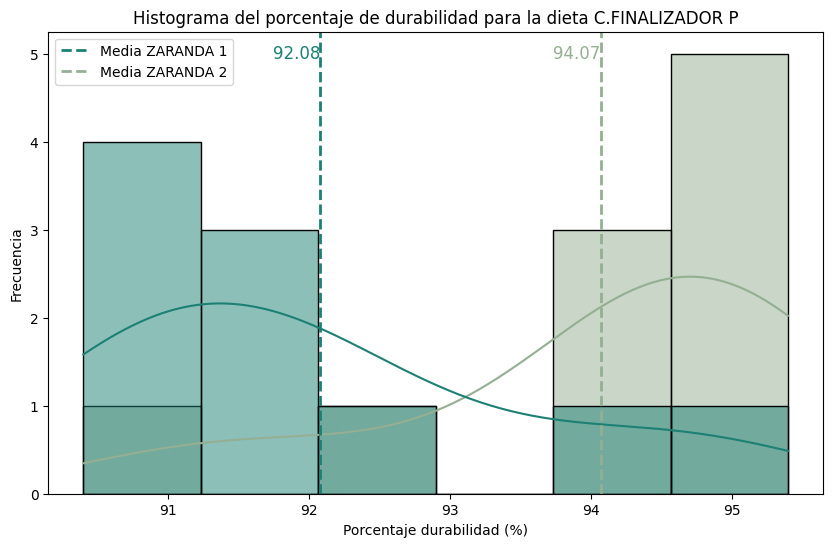

In [630]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Definir la paleta de colores personalizada
palette = ["#1c8074", "#94AF92"]

# Crear el histograma con hue por zaranda y colores personalizados
sns.histplot(data=df_fin, x="Porcentaje Durabilidad", hue="Punto", kde=True, palette=palette)#bins=20, alpha=0.5, 

# Calcular las medias de dureza por zaranda
mean_z1 = df_fin[df_fin["Punto"] == "ZARANDA 1"]["Porcentaje Durabilidad"].mean()
mean_z2 = df_fin[df_fin["Punto"] == "ZARANDA 2"]["Porcentaje Durabilidad"].mean()

# Dibujar líneas verticales en las medias
plt.axvline(mean_z1, color=palette[0], linestyle="dashed", linewidth=2, label="Media ZARANDA 1")
plt.axvline(mean_z2, color=palette[1], linestyle="dashed", linewidth=2, label="Media ZARANDA 2")
plt.text(mean_z1, plt.ylim()[1]-0.3 , f"{mean_z1:.2f}", color=palette[0], fontsize=12, ha="right")
plt.text(mean_z2, plt.ylim()[1]-0.3, f"{mean_z2:.2f}", color=palette[1], fontsize=12, ha="right")


# Configurar etiquetas
plt.xlabel("Porcentaje durabilidad (%)")
plt.ylabel("Frecuencia")
plt.title("Histograma del porcentaje de durabilidad para la dieta C.FINALIZADOR P")


# Agregar leyenda
plt.legend()
plt.savefig(f"../images_facenda/histograma_mejor_dieta_durabilidad.png", dpi=300)


# Mostrar el gráfico
plt.show()


In [554]:

pellets_measurements = ['Porcentaje Durabilidad']
build_stadistic(
    df=df_filter_pellet,
    metrics=pellets_measurements,
    group_=["Punto", "Dieta"],
    name_group="",
    name_file="porc_durabilidad_punto_dieta"
    )

,Punto,Dieta,Media,Cantidad,Mínimo,P25,Mediana,P75,Máximo,Desviación estandar,Varianza,Error estandar
0,ZARANDA 1,C.ENGORDE ESP VR,91.13,103,79.2,90.15,91.00,92.00,98.0,1.88,3.52,0.18
1,ZARANDA 2,C.ENGORDE ESP VR,91.47,9,90.0,90.60,91.80,92.00,93.0,1.01,1.02,0.34
2,ZARANDA 1,C.FINALIZADOR P,92.08,10,90.4,91.00,91.80,92.60,95.0,1.51,2.29,0.48
3,ZARANDA 2,C.FINALIZADOR P,94.07,10,91.0,93.85,94.50,95.10,95.4,1.43,2.05,0.45
4,ZARANDA 1,C.GESTACION ESP 2,90.76,8,89.2,90.00,90.75,91.50,92.2,1.02,1.04,0.36
5,POS-ENGRASE,C.GESTACION ESP P,93.14,23,88.6,91.30,92.80,96.00,96.8,2.45,5.99,0.51
6,ZARANDA 1,C.GESTACION ESP P,90.54,40,85.2,90.00,90.90,91.60,96.3,1.86,3.47,0.29
7,ZARANDA 2,C.GESTACION ESP P,91.07,18,89.0,90.00,90.80,92.00,94.5,1.36,1.84,0.32
8,POS-ENGRASE,C.GESTACION P,93.13,16,90.0,92.05,93.40,94.25,96.2,2.05,4.18,0.51
9,ZARANDA 1,C.GESTACION P,91.20,63,85.6,90.70,91.20,92.00,94.0,1.46,2.12,0.18


In [555]:
pellets_measurements = ['Dureza']
dureza_punto_dieta = build_stadistic(
    df=df_filter_pellet,
    metrics=pellets_measurements,
    group_=["Punto", "Dieta"],
    name_group="",
    name_file="dureza_punto_dieta"
    )
dureza_punto_dieta

,Punto,Dieta,Media,Cantidad,Mínimo,P25,Mediana,P75,Máximo,Desviación estandar,Varianza,Error estandar
0,ZARANDA 1,C.ENGORDE ESP VR,3.01,102,2.00,3.00,3.00,3.10,3.50,0.17,0.03,0.02
1,ZARANDA 2,C.ENGORDE ESP VR,3.09,9,3.00,3.00,3.00,3.10,3.60,0.20,0.04,0.07
2,ZARANDA 1,C.FINALIZADOR P,3.01,10,2.40,3.00,3.05,3.10,3.20,0.23,0.05,0.07
3,ZARANDA 2,C.FINALIZADOR P,3.16,10,3.00,3.02,3.10,3.20,3.70,0.21,0.04,0.07
4,ZARANDA 1,C.GESTACION ESP 2,3.04,8,3.00,3.00,3.00,3.10,3.10,0.05,0.00,0.02
5,POS-ENGRASE,C.GESTACION ESP P,4.48,23,2.80,3.00,3.10,3.55,30.00,5.58,31.16,1.16
6,ZARANDA 1,C.GESTACION ESP P,3.29,40,3.00,3.00,3.15,3.41,4.00,0.34,0.12,0.05
7,ZARANDA 2,C.GESTACION ESP P,3.11,18,3.00,3.00,3.00,3.18,3.50,0.18,0.03,0.04
8,POS-ENGRASE,C.GESTACION P,3.31,16,3.00,3.00,3.30,3.50,4.00,0.29,0.08,0.07
9,ZARANDA 1,C.GESTACION P,3.33,63,2.90,3.00,3.10,3.50,4.30,0.40,0.16,0.05


In [415]:
pellets_measurements = ['Porcentaje Durabilidad']
porc_durabilidad_punto_dieta = build_stadistic(
    df=df_filter_pellet,
    metrics=pellets_measurements,
    group_=["Punto", "Dieta"],
    name_group="",
    name_file="porc_durabilidad_punto_dieta"
    )
porc_durabilidad_punto_dieta

,Punto,Dieta,Media,Cantidad,Mínimo,P25,Mediana,P75,Máximo,Desviación estandar,Varianza,Error estandar
0,ZARANDA 1,C.ENGORDE ESP VR,91.13,103,79.2,90.15,91.00,92.00,98.0,1.88,3.52,0.18
1,ZARANDA 2,C.ENGORDE ESP VR,91.47,9,90.0,90.60,91.80,92.00,93.0,1.01,1.02,0.34
2,ZARANDA 1,C.FINALIZADOR P,92.08,10,90.4,91.00,91.80,92.60,95.0,1.51,2.29,0.48
3,ZARANDA 2,C.FINALIZADOR P,94.07,10,91.0,93.85,94.50,95.10,95.4,1.43,2.05,0.45
4,ZARANDA 1,C.GESTACION ESP 2,90.76,8,89.2,90.00,90.75,91.50,92.2,1.02,1.04,0.36
5,POS-ENGRASE,C.GESTACION ESP P,93.14,23,88.6,91.30,92.80,96.00,96.8,2.45,5.99,0.51
6,ZARANDA 1,C.GESTACION ESP P,90.54,40,85.2,90.00,90.90,91.60,96.3,1.86,3.47,0.29
7,ZARANDA 2,C.GESTACION ESP P,91.07,18,89.0,90.00,90.80,92.00,94.5,1.36,1.84,0.32
8,POS-ENGRASE,C.GESTACION P,93.13,16,90.0,92.05,93.40,94.25,96.2,2.05,4.18,0.51
9,ZARANDA 1,C.GESTACION P,91.20,63,85.6,90.70,91.20,92.00,94.0,1.46,2.12,0.18


In [456]:

def graficar_metricas(df, metricas, puntos, min_datos=5, colors=["#1c8074", "#94AF92"], save_path="../images_facenda/"):
    for metrica in metricas:
        # Construir estadísticas
        df_metricas = build_stadistic(
            df=df,
            metrics=[metrica],
            group_=["Punto", "Dieta"],
            name_group="",
            name_file=f"{metrica.lower()}_punto_dieta"
        )
        
        # Obtener dietas comunes
        dietas_puntos = {punto: set(df_metricas[df_metricas["Punto"] == punto]["Dieta"].unique()) for punto in puntos}
        comunes = set.intersection(*dietas_puntos.values())
        print(f"Elementos comunes en los {len(comunes)} conjuntos:", comunes)
        
        # Filtrar datos comunes
        df_filtrado = df[df["Dieta"].isin(comunes)]
        dfs_puntos = {punto: df_filtrado[df_filtrado["Punto"] == punto] for punto in puntos}
        
        # Filtrar categorías con menos de min_datos datos
        for punto, df_punto in dfs_puntos.items():
            valid_cats = df_punto['Dieta'].value_counts()
            valid_cats = valid_cats[valid_cats >= min_datos].index
            dfs_puntos[punto] = df_punto[df_punto['Dieta'].isin(valid_cats)]
        
        # Crear la figura con subplots
        fig, axs = plt.subplots(1, len(puntos), figsize=(15, 8), sharey=True)
        
        # Graficar para cada punto
        for ax, (punto, df_punto), color in zip(axs, dfs_puntos.items(), colors):
            sns.violinplot(data=df_punto, y='Dieta', x=metrica, 
                           inner='quartile', split=True, ax=ax, color=color)
            ax.set_title(punto)
            ax.set_xlabel(f"{metrica} ({'kg/cm2' if metrica == 'Dureza' else '%'})")
            ax.set_ylabel("Dieta" if ax == axs[0] else "")
            
            # Calcular y mostrar la mediana y desviación estándar
            categorias = df_punto["Dieta"].unique()
            for i, categoria in enumerate(categorias):
                datos_categoria = df_punto[df_punto["Dieta"] == categoria][metrica].dropna()
                if len(datos_categoria) < min_datos:
                    continue
                mediana = np.median(datos_categoria)
                std_dev = np.std(datos_categoria, ddof=1)
                ax.text(4 if metrica == 'Dureza' else 80, i + 0.15, f"Mediana: {mediana:.2f}", 
                        fontsize=10, color='red', ha='center', va='center')
                ax.text(4 if metrica == 'Dureza' else 80, i - 0.05, f"Std: {std_dev:.2f}", 
                        fontsize=10, color='blue', ha='center', va='center')
        
        # Ajustar layout y guardar la imagen
        plt.tight_layout()
        plt.savefig(f"{save_path}{metrica.lower()}_dieta_punto_violin_plots.png", dpi=300)
        plt.show()
        plt.close()



Elementos comunes en los 10 conjuntos: {'C.GESTACION P', 'C.REEMPLAZOS P SI-B', 'C.LEVANTE P', 'FINALIZADOR VR', 'C.LEVANTE VR P', 'C.GESTACION ESP P', 'C.ENGORDE ESP VR', 'LEVANTE R ESP VR', 'C.FINALIZADOR P', 'C.LEVANTE P CMC'}


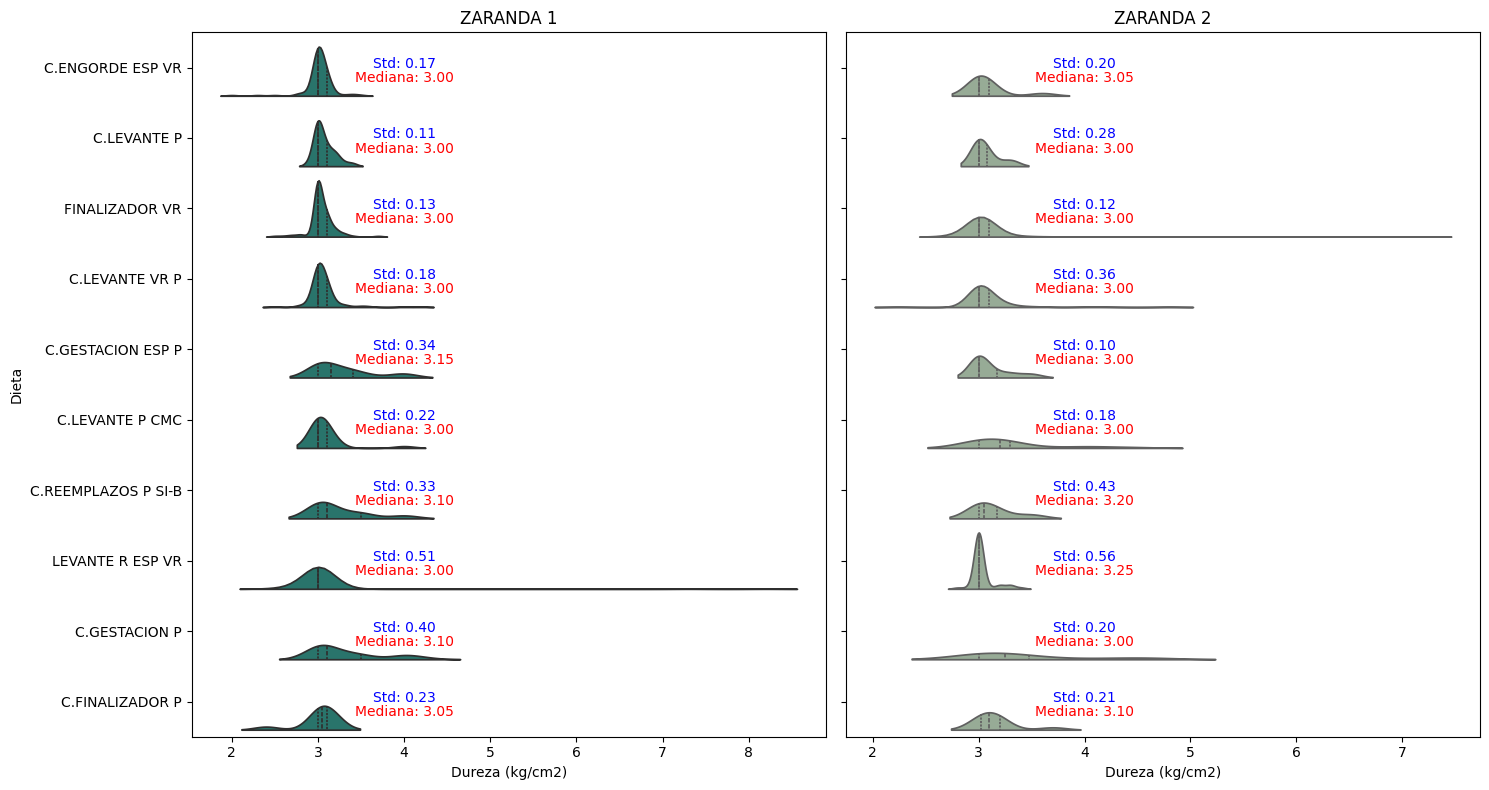

Elementos comunes en los 10 conjuntos: {'C.GESTACION P', 'C.REEMPLAZOS P SI-B', 'C.LEVANTE P', 'FINALIZADOR VR', 'C.LEVANTE VR P', 'C.GESTACION ESP P', 'C.ENGORDE ESP VR', 'LEVANTE R ESP VR', 'C.FINALIZADOR P', 'C.LEVANTE P CMC'}


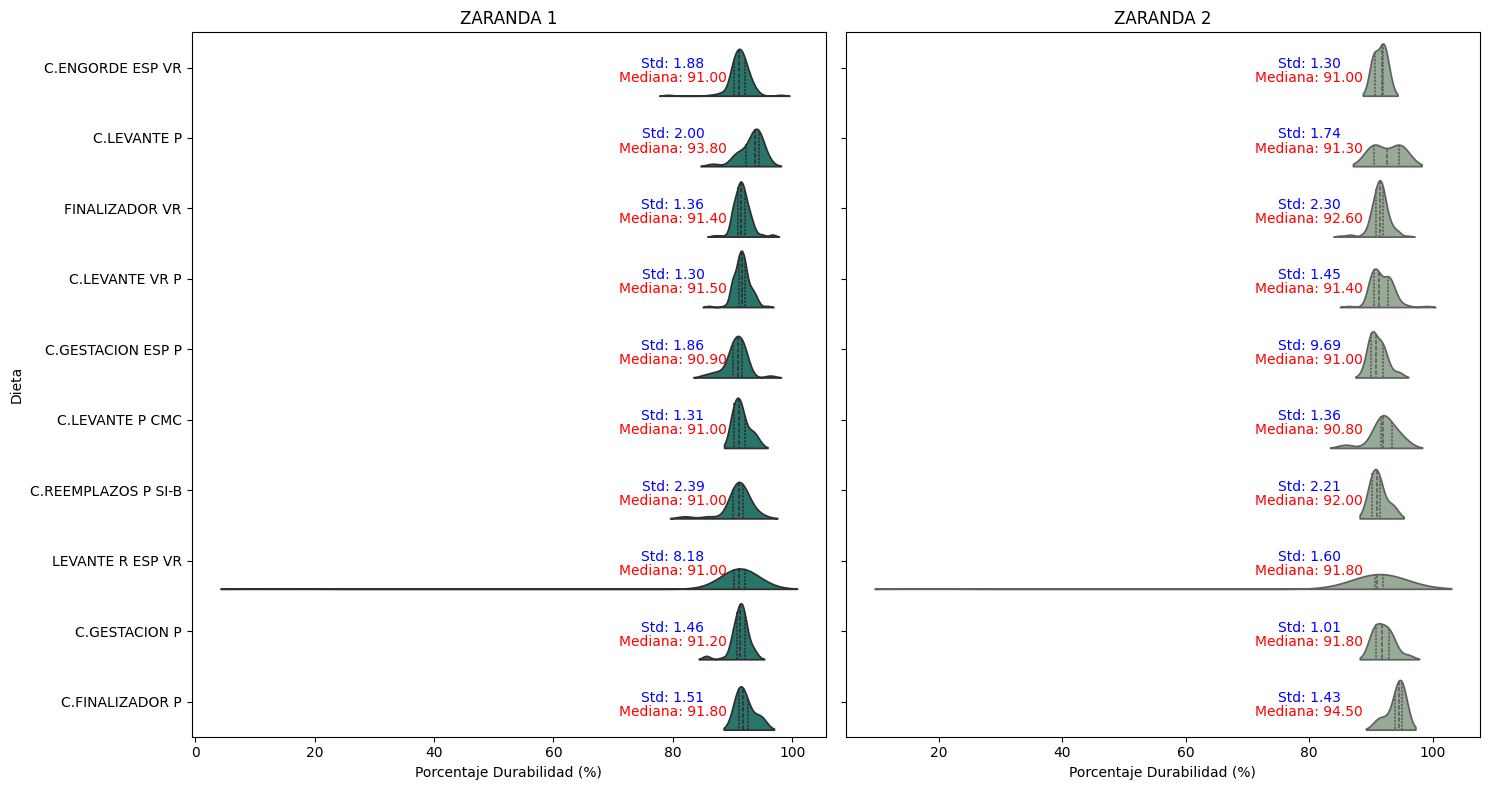

In [457]:

graficar_metricas(df=df_filter_pellet, metricas=['Dureza', 'Porcentaje Durabilidad'], puntos=["ZARANDA 1", "ZARANDA 2"])

In [490]:
def graficar_metricas(df, metricas, puntos, min_datos=5, colors=["#1c8074", "#94AF92"], save_path="../images_facenda/", name=""):
    for metrica in metricas:
        # Construir estadísticas
        df_metricas = build_stadistic(
            df=df,
            metrics=[metrica],
            group_=["Punto", "Dieta"],
            name_group="",
            name_file=f"{metrica.lower()}_punto_dieta"
        )
        
        # Obtener dietas comunes
        dietas_puntos = {punto: set(df_metricas[df_metricas["Punto"] == punto]["Dieta"].unique()) for punto in puntos}
        comunes = set.intersection(*dietas_puntos.values())
        print(f"Elementos comunes en los {len(comunes)} conjuntos:", comunes)
        
        # Filtrar datos comunes
        df_filtrado = df[df["Dieta"].isin(comunes)]
        dfs_puntos = {punto: df_filtrado[df_filtrado["Punto"] == punto] for punto in puntos}
        
        # Filtrar categorías con menos de min_datos datos
        for punto, df_punto in dfs_puntos.items():
            valid_cats = df_punto['Dieta'].value_counts()
            valid_cats = valid_cats[valid_cats >= min_datos].index
            dfs_puntos[punto] = df_punto[df_punto['Dieta'].isin(valid_cats)]
        
        # Crear la figura con subplots
        fig, axs = plt.subplots(1, len(puntos), figsize=(15, 8), sharey=True)
        
        # Graficar para cada punto
        for ax, (punto, df_punto), color in zip(axs, dfs_puntos.items(), colors):
            sns.violinplot(
                data=df_punto,
                y='Dieta',
                x=metrica,
                inner='quartile',
                split=True,
                ax=ax,
                color=color
            )
            ax.set_title(punto)
            if metrica == 'Dureza':
                ax.set_xlabel(f"{metrica} ({'kg/cm2' if metrica == 'Dureza' else '%'})")
            elif metrica == 'Termometro industrial':
                 ax.set_xlabel(f"Temperatura (°C)")
            else:
                 ax.set_xlabel(f"{metrica} ({'kg/cm2' if metrica == 'Dureza' else '%'})")

            ax.set_ylabel("Dieta" if ax == axs[0] else "")
            
            # Ajustar límites del eje x según la métrica
            if metrica == 'Dureza':
                ax.set_xlim(2, 5)
            elif metrica == 'Termometro industrial':
                ax.set_xlim(40, 90)
            else:
                ax.set_xlim(60, 100)
            
            # Calcular y mostrar la mediana y desviación estándar
            categorias = df_punto["Dieta"].unique()
            for i, categoria in enumerate(categorias):
                datos_categoria = (
                    df_punto[df_punto["Dieta"] == categoria][metrica]
                    .dropna()
                )
                if len(datos_categoria) < min_datos:
                    continue
                mediana = np.median(datos_categoria)
                std_dev = np.std(datos_categoria, ddof=1)
                
                # Ajustar la posición del texto en función de la métrica
                x_text = 4 if metrica == 'Dureza' else 80
                ax.text(
                    x_text,
                    i + 0.15,
                    f"Mediana: {mediana:.2f}",
                    fontsize=10,
                    color='red',
                    ha='center',
                    va='center'
                )
                ax.text(
                    x_text,
                    i - 0.05,
                    f"Std: {std_dev:.2f}",
                    fontsize=10,
                    color='blue',
                    ha='center',
                    va='center'
                )
        
        # Ajustar layout y guardar la imagen
        plt.tight_layout()
        plt.savefig(f"{save_path}{metrica.lower()}_{name}_dieta_punto_violin_plots.png", dpi=300)
        plt.show()
        plt.close()


Elementos comunes en los 10 conjuntos: {'C.GESTACION P', 'C.REEMPLAZOS P SI-B', 'C.LEVANTE P', 'FINALIZADOR VR', 'C.LEVANTE VR P', 'C.GESTACION ESP P', 'C.ENGORDE ESP VR', 'LEVANTE R ESP VR', 'C.FINALIZADOR P', 'C.LEVANTE P CMC'}


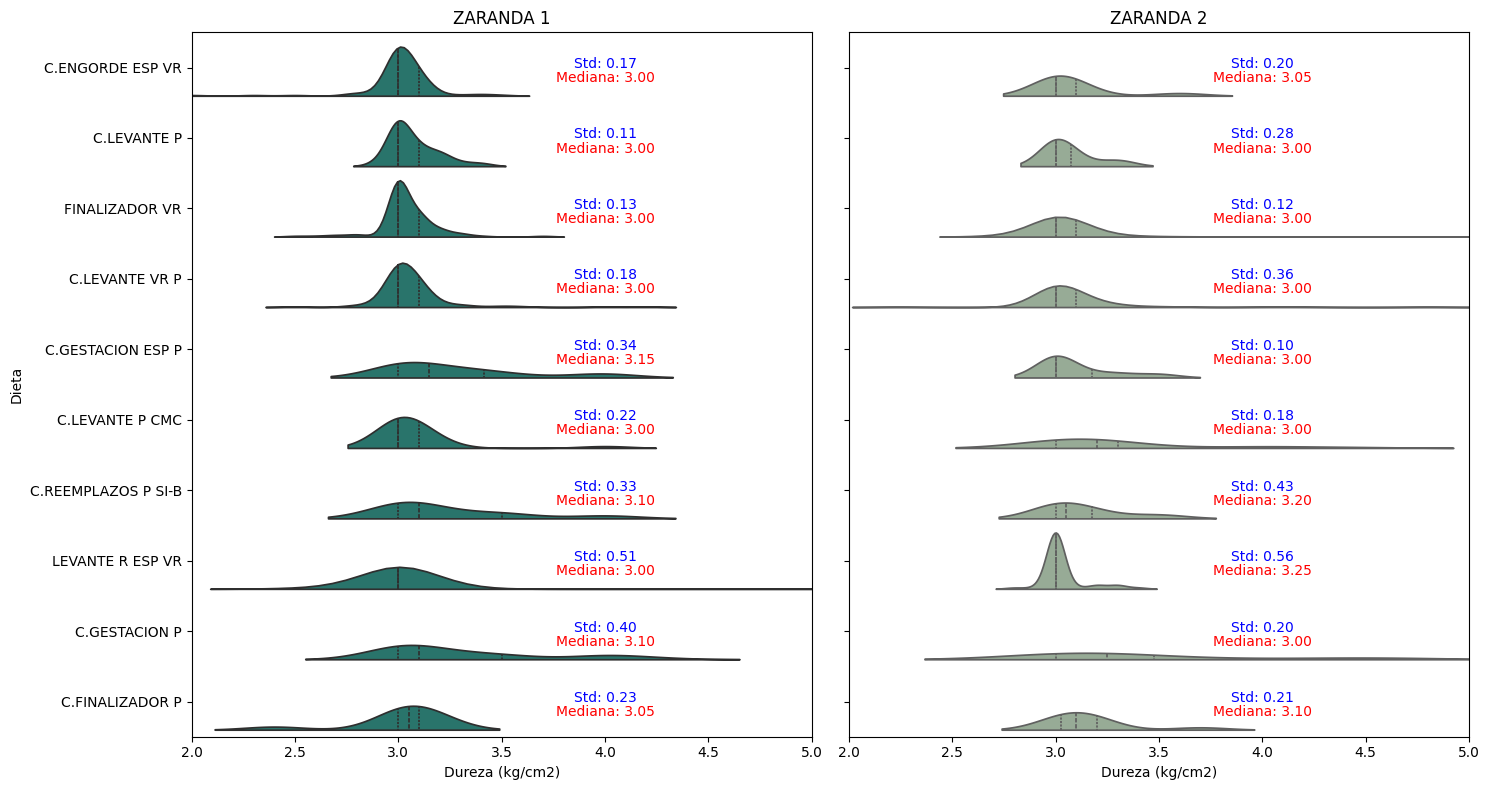

Elementos comunes en los 10 conjuntos: {'C.GESTACION P', 'C.REEMPLAZOS P SI-B', 'C.LEVANTE P', 'FINALIZADOR VR', 'C.LEVANTE VR P', 'C.GESTACION ESP P', 'C.ENGORDE ESP VR', 'LEVANTE R ESP VR', 'C.FINALIZADOR P', 'C.LEVANTE P CMC'}


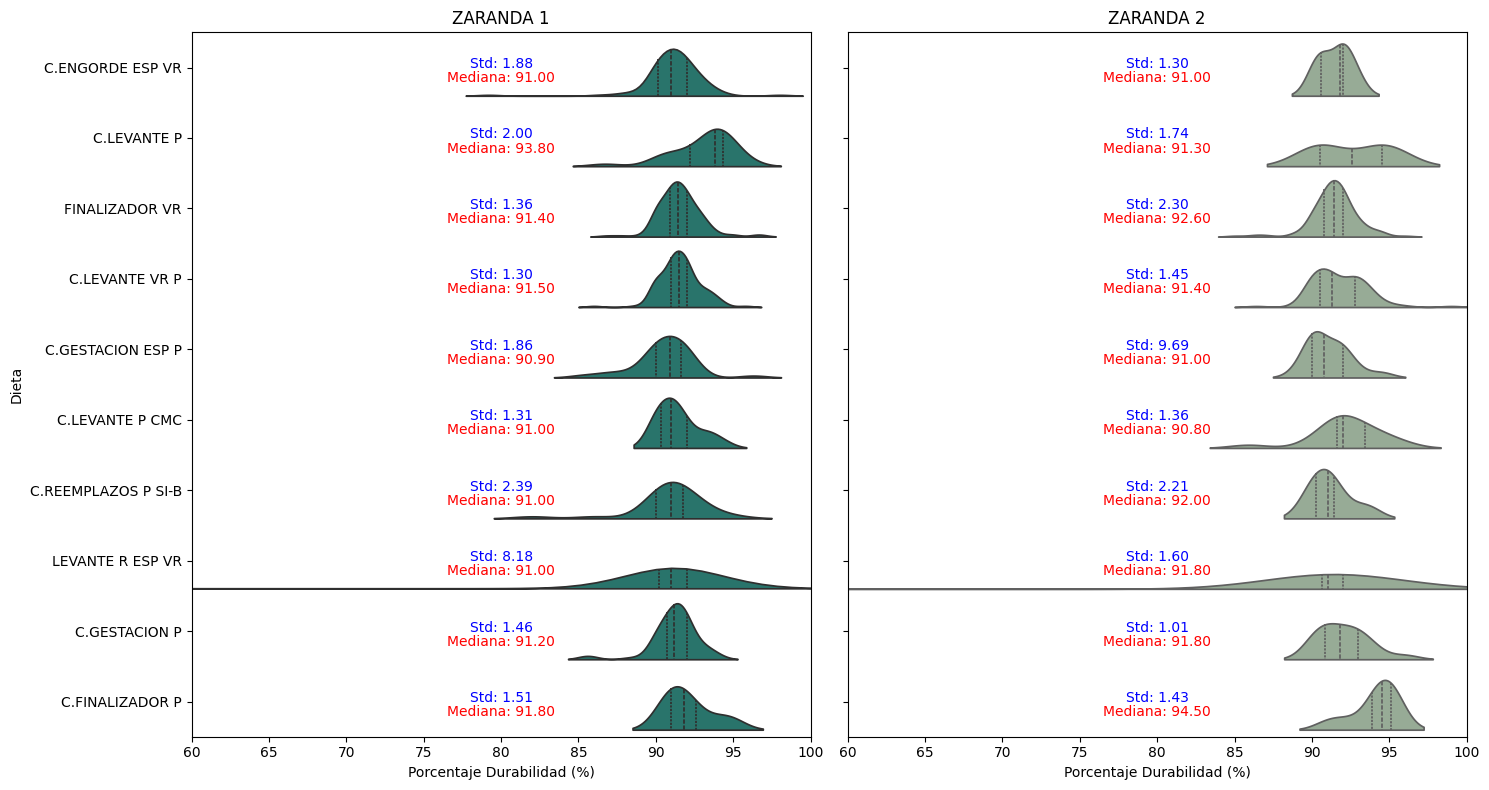

In [491]:
graficar_metricas(df=df_filter_pellet, metricas=['Dureza', 'Porcentaje Durabilidad'], puntos=["ZARANDA 1", "ZARANDA 2"])

In [492]:
temp["Punto"].value_counts()

Punto
ACONDICIONADOR 2    73
PELLET 2            72
PELLET 3            72
ACONDICIONADOR 1    71
ACONDICIONADOR 3    71
PELLET 1            71
ENFRIADORA 1        71
ENFRIADORA 2        71
ENFRIADORA 3        70
Name: count, dtype: int64

In [493]:

pellets_measurements = ['Termometro planta', 'Termometro industrial']
build_stadistic(
    df=temp,
    metrics=pellets_measurements,
    group_=["Punto"],
    name_group="Instrumento",
    name_file="temp_punto"
    )

,Instrumento,Punto,Media,Cantidad,Mínimo,P25,Mediana,P75,Máximo,Desviación estandar,Varianza,Error estandar
0,Termometro planta,ACONDICIONADOR 1,71.39,71,7.00,70.00,72.0,74.50,80.0,8.59,73.76,1.02
1,Termometro planta,ACONDICIONADOR 2,67.67,73,6.00,65.00,71.0,73.00,80.0,13.82,190.94,1.62
2,Termometro planta,ACONDICIONADOR 3,70.47,71,56.20,69.10,71.2,73.10,77.5,4.04,16.33,0.48
9,Termometro industrial,ACONDICIONADOR 1,71.38,71,60.10,69.85,71.8,73.20,78.6,3.72,13.83,0.44
10,Termometro industrial,ACONDICIONADOR 2,69.30,73,50.20,67.00,70.5,72.30,83.3,5.35,28.59,0.63
11,Termometro industrial,ACONDICIONADOR 3,70.07,71,12.10,69.75,71.1,73.40,77.4,7.95,63.15,0.94
12,Termometro industrial,ENFRIADORA 1,31.08,71,26.30,29.70,30.9,32.35,35.6,1.98,3.93,0.24
13,Termometro industrial,ENFRIADORA 2,29.92,71,25.30,28.50,29.3,31.55,34.1,2.03,4.10,0.24
14,Termometro industrial,ENFRIADORA 3,30.64,70,27.10,28.70,30.4,32.40,36.1,2.29,5.24,0.27
15,Termometro industrial,PELLET 1,80.33,71,8.36,80.35,81.4,82.40,85.5,8.95,80.06,1.06


In [494]:
build_stadistic(
    df=temp,
    metrics=pellets_measurements,
    group_=["Punto", "Dieta"],
    name_group="Instrumento",
    name_file="temp_punto_dieta"
    )

,Instrumento,Punto,Dieta,Media,Cantidad,Mínimo,P25,Mediana,P75,Máximo,Desviación estandar,Varianza,Error estandar
0,Termometro planta,ACONDICIONADOR 1,C.ENGORDE ESP VR,61.75,8,7.00,67.75,70.00,70.50,72.0,22.26,495.64,7.87
1,Termometro industrial,ACONDICIONADOR 1,C.ENGORDE ESP VR,69.25,8,65.50,68.88,69.45,70.12,71.4,1.78,3.17,0.63
2,Termometro planta,ACONDICIONADOR 2,C.ENGORDE ESP VR,60.25,8,7.00,64.75,65.00,70.50,74.0,21.84,477.07,7.72
3,Termometro industrial,ACONDICIONADOR 2,C.ENGORDE ESP VR,68.09,8,66.00,66.10,67.45,70.50,70.6,2.23,4.95,0.79
4,Termometro industrial,ENFRIADORA 1,C.ENGORDE ESP VR,31.91,8,29.60,30.30,31.85,32.92,34.9,1.92,3.69,0.68
5,Termometro industrial,ENFRIADORA 2,C.ENGORDE ESP VR,30.76,8,29.00,29.38,30.45,32.30,32.7,1.57,2.48,0.56
6,Termometro industrial,PELLET 1,C.ENGORDE ESP VR,79.74,8,74.80,79.25,80.35,80.70,82.8,2.39,5.70,0.84
7,Termometro industrial,PELLET 2,C.ENGORDE ESP VR,79.49,8,68.50,80.18,80.35,81.03,84.1,4.63,21.43,1.64
8,Termometro planta,ACONDICIONADOR 3,C.INICIACIÓN P INMUNIDAD,71.49,17,62.90,70.20,71.60,73.40,75.8,2.98,8.86,0.72
9,Termometro industrial,ACONDICIONADOR 3,C.INICIACIÓN P INMUNIDAD,71.63,17,62.90,70.90,71.60,73.20,75.9,2.95,8.70,0.72


In [495]:
temp_1 = temp[temp["Punto"].isin(["PELLET 1", "ACONDICIONADOR 1"])]
temp_1

,index,FECHA TOMA DE MUESTRA,HORA,TURNO,Punto,Termometro planta,Termometro industrial,Código,Dieta,Op,RESPONSABLE,OBSERVACIONES,Unnamed: 11,Unnamed: 12
0,0,2024-11-06 00:00:00,04:36:00,1.0,ACONDICIONADOR 1,72.0,73.2,200541.0,C.LEVANTE VR P,19620,VANESSA LOSADA,NaN,NaN,NaN
3,3,NaN,NaN,NaN,PELLET 1,NaN,82.2,200541.0,C.LEVANTE VR P,19620,VANESSA LOSADA,NaN,NaN,NaN
9,9,2024-11-05 00:00:00,16:00:00,3.0,ACONDICIONADOR 1,76.0,71.2,200118.0,C.INICIACIÓN P INMUNIDAD,19617,LUZ ANGELA TOCORA,NaN,NaN,NaN
12,12,NaN,NaN,NaN,PELLET 1,NaN,76.9,200118.0,C.INICIACIÓN P INMUNIDAD,19617,LUZ ANGELA TOCORA,NaN,NaN,NaN
18,18,2024-11-05 00:00:00,20:00:00,3.0,ACONDICIONADOR 1,71.0,71.1,200541.0,C.LEVANTE VR P,19616,YESICA MARTINEZ,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,174,NaT,NaN,NaN,PELLET 1,NaN,84.6,200544.0,FINALIZADOR VR,20153.0,LUZ ANGELA TOCORA,NaN,NaN,NaN
774,180,2024-01-28 00:00:00,22:40:00,3.0,ACONDICIONADOR 1,74.0,69.1,200542.0,LEVANTE R ESP VR,20190.0,LUZ ANGELA TOCORA,NaN,NaN,NaN
777,183,NaT,NaN,NaN,PELLET 1,NaN,81.3,200542.0,LEVANTE R ESP VR,20190.0,LUZ ANGELA TOCORA,NaN,NaN,NaN
783,189,2025-01-29 00:00:00,NaN,NaN,ACONDICIONADOR 1,74.5,72.5,200541.0,C.LEVANTE VR P,20194.0,VANESSA LOSADA,NaN,NaN,NaN


Elementos comunes en los 4 conjuntos: {'C.ENGORDE ESP VR', 'FINALIZADOR VR', 'C.LEVANTE VR P', 'LEVANTE R ESP VR'}


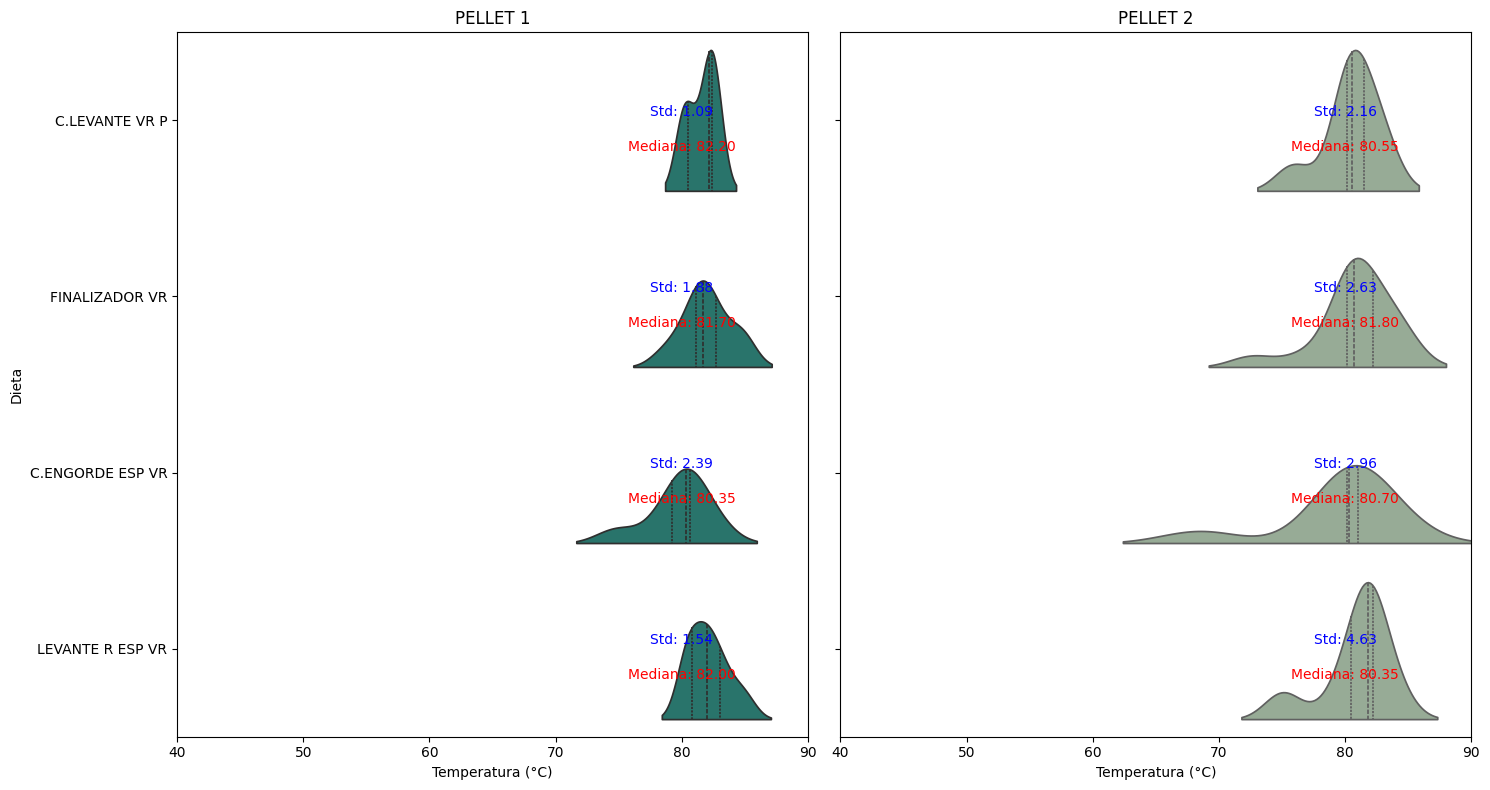

In [496]:

graficar_metricas(df=temp, metricas=['Termometro industrial'], puntos=["PELLET 1", "PELLET 2"])


Elementos comunes en los 4 conjuntos: {'C.ENGORDE ESP VR', 'FINALIZADOR VR', 'C.LEVANTE VR P', 'LEVANTE R ESP VR'}


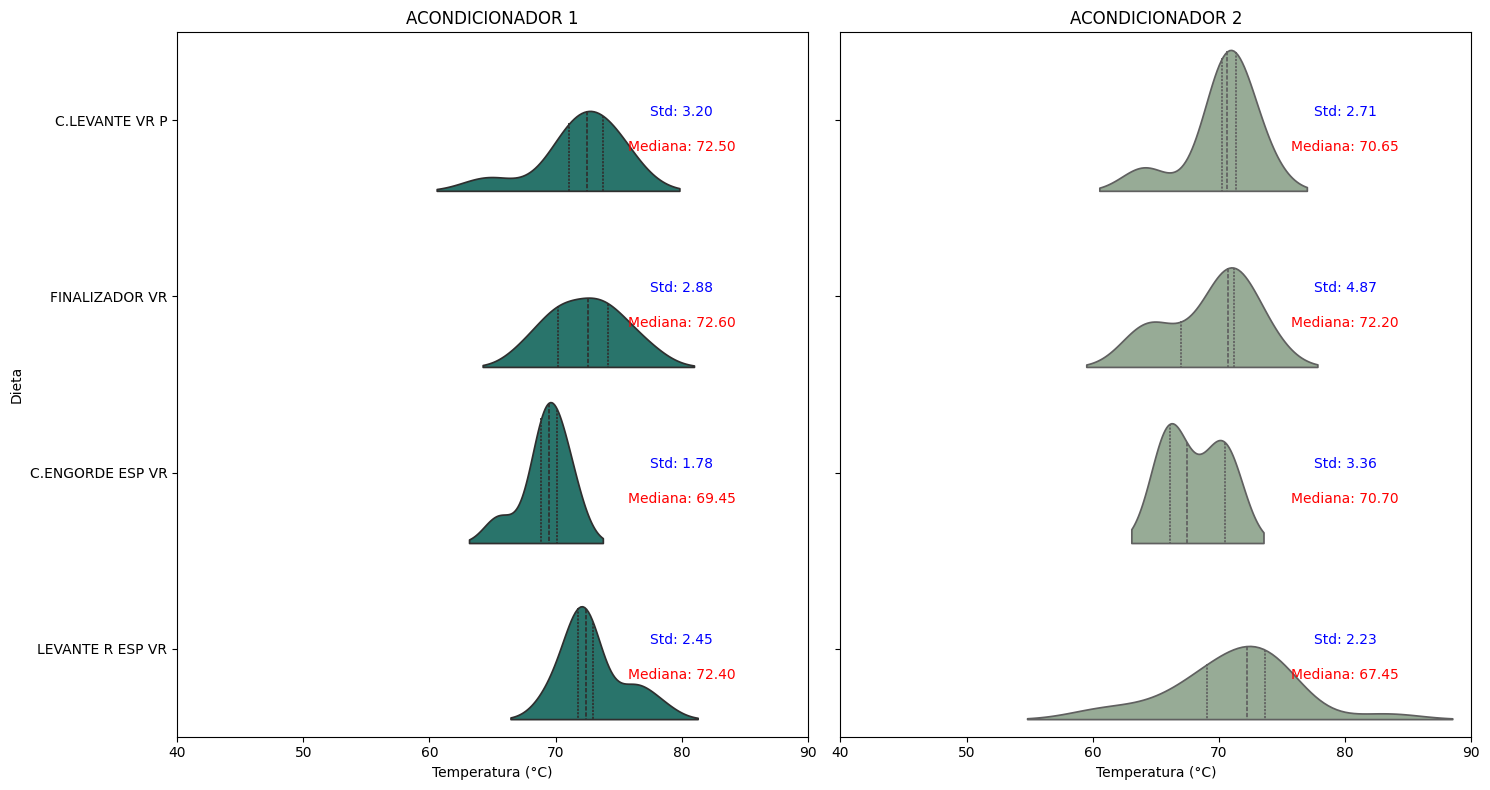

In [498]:
graficar_metricas(df=temp, metricas=['Termometro industrial'], puntos=["ACONDICIONADOR 1", "ACONDICIONADOR 2"],name="acon12")


Elementos comunes en los 2 conjuntos: {'FINALIZADOR VR', 'LEVANTE R ESP VR'}


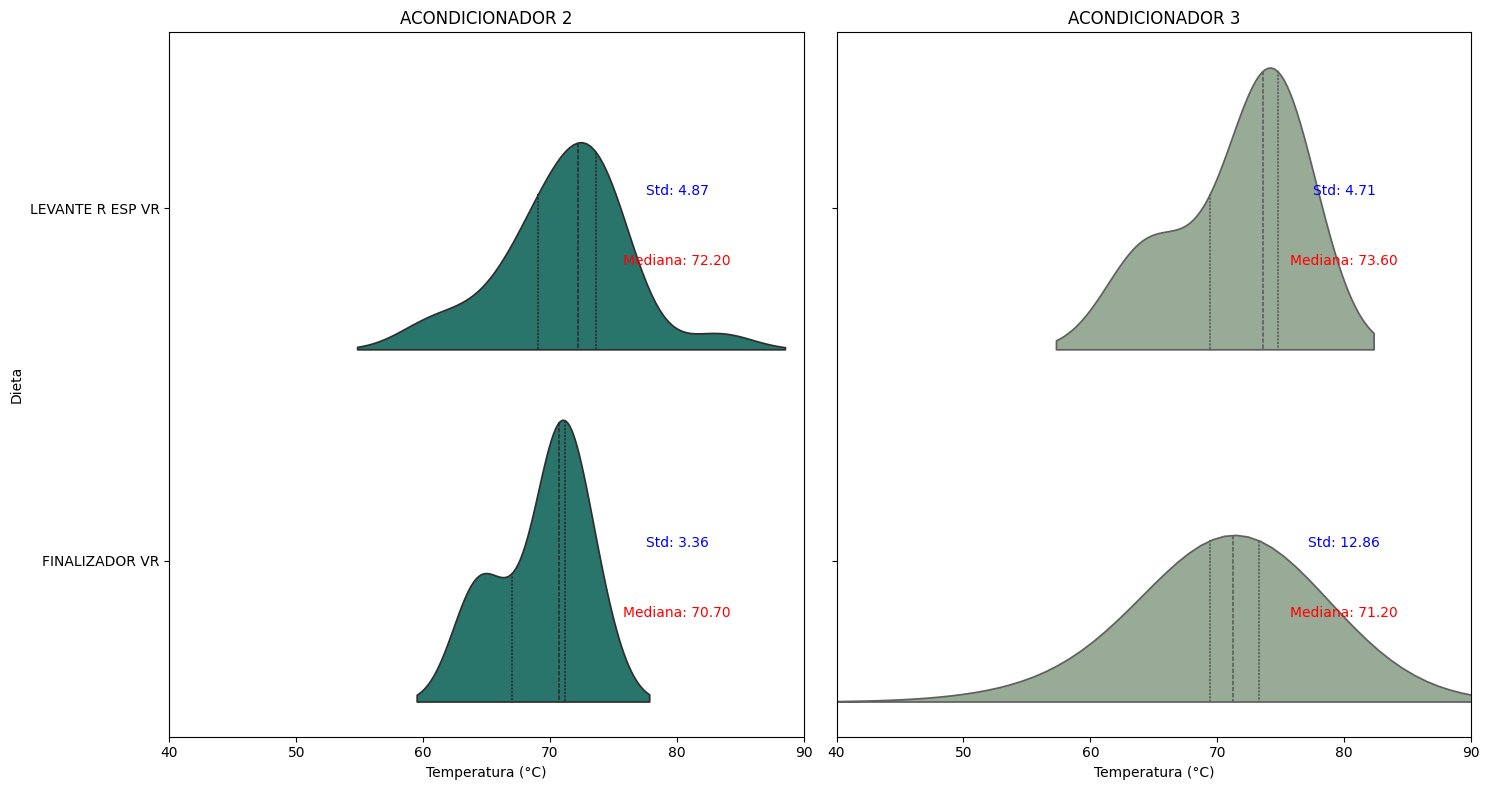

In [499]:
graficar_metricas(df=temp, metricas=['Termometro industrial'], puntos=["ACONDICIONADOR 2", "ACONDICIONADOR 3"], name="acon23")

In [489]:
#Fazenda, comparar, diferencias estadisticas por producto entre las peletizatizadar,
# significancia estadistica
#mejores resultados por que peletizar

# Fazenda,

In [639]:
temp["Dieta"].value_counts()

Dieta
FINALIZADOR VR                    169
LEVANTE R ESP VR                  157
C.LEVANTE VR P                     62
C.INICIACIÓN P INMUNIDAD           56
C.ENGORDE ESP VR                   51
C.GESTACION P                      39
C.GESTACION ESP P                  21
C.PREINICIACIÓN F1 P INMUNIDAD     18
LEVANTE VR                         17
C.LACTANCIA PRIMERIZAS P           12
C.PREINICIACIÓN F2 P INMUNIDAD      9
C.LEVANTE CMC ESP P                 8
C.LACTANCIA PRIMERIZAS ESP P        6
C.LEVANTE P CMC                     6
C.GESTACION ESP 2                   6
LACTANCIA PRIMERIZA                 3
C.LACTANCIA PRIMERIZAS.             3
Name: count, dtype: int64

In [633]:
temp_pellet_1 = temp[temp["Punto"] == "PELLET 1"]
temp_pellet_1["Dieta"].value_counts()

Dieta
LEVANTE R ESP VR                  21
FINALIZADOR VR                    17
C.LEVANTE VR P                     9
C.ENGORDE ESP VR                   8
C.GESTACION P                      5
C.PREINICIACIÓN F1 P INMUNIDAD     3
LEVANTE VR                         2
C.INICIACIÓN P INMUNIDAD           1
C.GESTACION ESP 2                  1
C.GESTACION ESP P                  1
C.PREINICIACIÓN F2 P INMUNIDAD     1
C.LEVANTE P CMC                    1
C.LEVANTE CMC ESP P                1
Name: count, dtype: int64

In [638]:
temp_pellet_1[temp_pellet_1["Dieta"] == "C.FINALIZADOR P"]["Termometro industrial"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Termometro industrial, dtype: float64

In [637]:
temp_pellet_2 = temp[temp["Punto"] == "PELLET 2"]
temp_pellet_2[temp_pellet_2["Dieta"] == "FINALIZADOR VR"]["Termometro industrial"].describe()

count    16.000000
mean     80.775000
std       2.960968
min      72.600000
25%      80.175000
50%      80.700000
75%      82.225000
max      84.600000
Name: Termometro industrial, dtype: float64

In [645]:
from graphviz import Digraph

dot = Digraph()

# Agregar nodos
dot.node('A', 'MOLIENDA', style='filled', fillcolor='#dae8fc')
dot.node('B', 'TOLVA', style='filled', fillcolor='#e1d5e7')
dot.node('C', 'ZARANDA 1', style='filled', fillcolor='#94AF92')
dot.node('D', 'ZARANDA 2', style='filled', fillcolor='#94AF92')
dot.node('E', 'DUREZA (kg/cm2)', shape='ellipse')
dot.node('F', 'DURABILIDAD (%)', shape='ellipse')

# Agregar conexiones
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('B', 'D')
dot.edge('C', 'E')
dot.edge('D', 'F')

# Guardar y visualizar
dot.render('diagrama', format='png', cleanup=False)


ModuleNotFoundError: No module named 'graphviz'